In [78]:
# Impor library yang diperlukan
import pandas as pd # Lyblary untuk mengolah dan memanipulasi data
import matplotlib.pyplot as plt # Untuk Memvisualisasikan data tradisional(Box Plot, histogram, dll)
import seaborn as sns # Untuk Memvisualisasikan data yang lebih kompleks(hitmap, time series)

In [79]:
# Baca dataset "hour" dan "day"
data_hour = pd.read_csv("data/hour.csv")
data_day = pd.read_csv("data/day.csv")


# Pertanyaan Bisnis
Pertanyaan 1: Bagaimana tren harian jumlah penyewa sepeda selama setahun?

Pertanyaan 2: Apakah faktor cuaca berpengaruh terhadap jumlah penyewa sepeda harian?

## 1. Dasar - Dasar Analisis Data

In [80]:
# Mengecek jumlah colom dan baris pada data hour
data_hour.shape

(17379, 17)

In [81]:
# Mengecek jumlah colom dan baris pada data day
data_day.shape

(731, 16)

In [82]:
# Menampilkan 5 teratas dari dataset hour
data_hour.head()

instant      dteday  season  yr  mnth  hr  holiday  weekday  workingday  \
0        1  2011-01-01       1   0     1   0        0        6           0   
1        2  2011-01-01       1   0     1   1        0        6           0   
2        3  2011-01-01       1   0     1   2        0        6           0   
3        4  2011-01-01       1   0     1   3        0        6           0   
4        5  2011-01-01       1   0     1   4        0        6           0   

   weathersit  temp   atemp   hum  windspeed  casual  registered  cnt  
0           1  0.24  0.2879  0.81        0.0       3          13   16  
1           1  0.22  0.2727  0.80        0.0       8          32   40  
2           1  0.22  0.2727  0.80        0.0       5          27   32  
3           1  0.24  0.2879  0.75        0.0       3          10   13  
4           1  0.24  0.2879  0.75        0.0       0           1    1

In [83]:
# Menampilkan 5 terbawah dari dataset hour
data_hour.tail()

instant      dteday  season  yr  mnth  hr  holiday  weekday  \
17374    17375  2012-12-31       1   1    12  19        0        1   
17375    17376  2012-12-31       1   1    12  20        0        1   
17376    17377  2012-12-31       1   1    12  21        0        1   
17377    17378  2012-12-31       1   1    12  22        0        1   
17378    17379  2012-12-31       1   1    12  23        0        1   

       workingday  weathersit  temp   atemp   hum  windspeed  casual  \
17374           1           2  0.26  0.2576  0.60     0.1642      11   
17375           1           2  0.26  0.2576  0.60     0.1642       8   
17376           1           1  0.26  0.2576  0.60     0.1642       7   
17377           1           1  0.26  0.2727  0.56     0.1343      13   
17378           1           1  0.26  0.2727  0.65     0.1343      12   

       registered  cnt  
17374         108  119  
17375          81   89  
17376          83   90  
17377          48   61  
17378          37   49

In [84]:
# Menampilkan 5 teratas dari dataset day
data_day.head()

instant      dteday  season  yr  mnth  holiday  weekday  workingday  \
0        1  2011-01-01       1   0     1        0        6           0   
1        2  2011-01-02       1   0     1        0        0           0   
2        3  2011-01-03       1   0     1        0        1           1   
3        4  2011-01-04       1   0     1        0        2           1   
4        5  2011-01-05       1   0     1        0        3           1   

   weathersit      temp     atemp       hum  windspeed  casual  registered  \
0           2  0.344167  0.363625  0.805833   0.160446     331         654   
1           2  0.363478  0.353739  0.696087   0.248539     131         670   
2           1  0.196364  0.189405  0.437273   0.248309     120        1229   
3           1  0.200000  0.212122  0.590435   0.160296     108        1454   
4           1  0.226957  0.229270  0.436957   0.186900      82        1518   

    cnt  
0   985  
1   801  
2  1349  
3  1562  
4  1600

In [85]:
# Menampilkan 5 terbawah dari dataset day
data_day.tail()

instant      dteday  season  yr  mnth  holiday  weekday  workingday  \
726      727  2012-12-27       1   1    12        0        4           1   
727      728  2012-12-28       1   1    12        0        5           1   
728      729  2012-12-29       1   1    12        0        6           0   
729      730  2012-12-30       1   1    12        0        0           0   
730      731  2012-12-31       1   1    12        0        1           1   

     weathersit      temp     atemp       hum  windspeed  casual  registered  \
726           2  0.254167  0.226642  0.652917   0.350133     247        1867   
727           2  0.253333  0.255046  0.590000   0.155471     644        2451   
728           2  0.253333  0.242400  0.752917   0.124383     159        1182   
729           1  0.255833  0.231700  0.483333   0.350754     364        1432   
730           2  0.215833  0.223487  0.577500   0.154846     439        2290   

      cnt  
726  2114  
727  3095  
728  1341  
729  1796  
730  2729

In [86]:
# Menampilkan informasi dari data hour
data_hour.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


In [87]:
# menampilkan informasi dari data day
data_day.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [88]:
# Menampilkan deskripsi dari data hour
data_hour.describe()

instant        season            yr          mnth            hr  \
count  17379.0000  17379.000000  17379.000000  17379.000000  17379.000000   
mean    8690.0000      2.501640      0.502561      6.537775     11.546752   
std     5017.0295      1.106918      0.500008      3.438776      6.914405   
min        1.0000      1.000000      0.000000      1.000000      0.000000   
25%     4345.5000      2.000000      0.000000      4.000000      6.000000   
50%     8690.0000      3.000000      1.000000      7.000000     12.000000   
75%    13034.5000      3.000000      1.000000     10.000000     18.000000   
max    17379.0000      4.000000      1.000000     12.000000     23.000000   

            holiday       weekday    workingday    weathersit          temp  \
count  17379.000000  17379.000000  17379.000000  17379.000000  17379.000000   
mean       0.028770      3.003683      0.682721      1.425283      0.496987   
std        0.167165      2.005771      0.465431      0.639357      0.192556   
min        0.000000      0.000000      0.000000      1.000000      0.020000   
25%        0.000000      1.000000      0.000000      1.000000      0.340000   
50%        0.000000      3.000000      1.000000      1.000000      0.500000   
75%        0.000000      5.000000      1.000000      2.000000      0.660000   
max        1.000000      6.000000      1.000000      4.000000      1.000000   

              atemp           hum     windspeed        casual    registered  \
count  17379.000000  17379.000000  17379.000000  17379.000000  17379.000000   
mean       0.475775      0.627229      0.190098     35.676218    153.786869   
std        0.171850      0.192930      0.122340     49.305030    151.357286   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%        0.333300      0.480000      0.104500      4.000000     34.000000   
50%        0.484800      0.630000      0.194000     17.000000    115.000000   
75%        0.621200      0.780000      0.253700     48.000000    220.000000   
max        1.000000      1.000000      0.850700    367.000000    886.000000   

                cnt  
count  17379.000000  
mean     189.463088  
std      181.387599  
min        1.000000  
25%       40.000000  
50%      142.000000  
75%      281.000000  
max      977.000000

In [89]:
# Menampilkan Deskripsi dari data day
data_day.describe()

instant      season          yr        mnth     holiday     weekday  \
count  731.000000  731.000000  731.000000  731.000000  731.000000  731.000000   
mean   366.000000    2.496580    0.500684    6.519836    0.028728    2.997264   
std    211.165812    1.110807    0.500342    3.451913    0.167155    2.004787   
min      1.000000    1.000000    0.000000    1.000000    0.000000    0.000000   
25%    183.500000    2.000000    0.000000    4.000000    0.000000    1.000000   
50%    366.000000    3.000000    1.000000    7.000000    0.000000    3.000000   
75%    548.500000    3.000000    1.000000   10.000000    0.000000    5.000000   
max    731.000000    4.000000    1.000000   12.000000    1.000000    6.000000   

       workingday  weathersit        temp       atemp         hum   windspeed  \
count  731.000000  731.000000  731.000000  731.000000  731.000000  731.000000   
mean     0.683995    1.395349    0.495385    0.474354    0.627894    0.190486   
std      0.465233    0.544894    0.183051    0.162961    0.142429    0.077498   
min      0.000000    1.000000    0.059130    0.079070    0.000000    0.022392   
25%      0.000000    1.000000    0.337083    0.337842    0.520000    0.134950   
50%      1.000000    1.000000    0.498333    0.486733    0.626667    0.180975   
75%      1.000000    2.000000    0.655417    0.608602    0.730209    0.233214   
max      1.000000    3.000000    0.861667    0.840896    0.972500    0.507463   

            casual   registered          cnt  
count   731.000000   731.000000   731.000000  
mean    848.176471  3656.172367  4504.348837  
std     686.622488  1560.256377  1937.211452  
min       2.000000    20.000000    22.000000  
25%     315.500000  2497.000000  3152.000000  
50%     713.000000  3662.000000  4548.000000  
75%    1096.000000  4776.500000  5956.000000  
max    3410.000000  6946.000000  8714.000000

## 2. Penerapan Dasar-Dasar Descriptive Statistics

#### a. Data Hour

In [90]:
# Central Tendency (Tendensi Pusat)
mean_temp = data_hour['temp'].mean() #rata-rata (mean)
median_temp = data_hour['temp'].median() #nilai tengah(median)
mode_temp = data_hour['temp'].mode().values[0]

print("Central Tendency (Tendensi Pusat):")
print(f"Rata-rata (mean) temperatur: {mean_temp:.2f}")
print(f"Median temperatur: {median_temp}")
print(f"Mode temperatur: {mode_temp}\n")


Central Tendency (Tendensi Pusat):
Rata-rata (mean) temperatur: 0.50
Median temperatur: 0.5
Mode temperatur: 0.62



Hasil analisis tendensi pusat ini menggambarkan data temperatur yang memiliki distribusi yang hampir simetris atau mendekati distribusi normal. Rata-rata temperatur sebesar 0.50 menunjukkan bahwa nilai tengah dari data tersebut adalah cukup dekat dengan nilai median, yaitu 0.5. Ini menunjukkan bahwa data temperatur cenderung terdistribusi secara merata di sekitar nilai tengah. Mode temperatur yang sedikit lebih tinggi dari rata-rata dan median, yaitu 0.62, menunjukkan bahwa ada sedikit puncak atau nilai yang sering muncul dalam data temperatur. Keseluruhan, ini mengindikasikan bahwa data temperatur memiliki kecenderungan untuk berkumpul di sekitar nilai tengah yang mendekati 0.5 dengan sedikit variasi.

In [91]:
# Dispersion (Sebaran)
range_temp = data_hour['temp'].max() - data_hour['temp'].min()
iqr_temp = data_hour['temp'].quantile(0.75) - data_hour['temp'].quantile(0.25)
variance_temp = data_hour['temp'].var()
std_dev_temp = data_hour['temp'].std()

print("Dispersion (Sebaran):")
print(f"Rentang (range) temperatur: {range_temp:.2f}")
print(f"Rentang interkuartil (IQR) temperatur: {iqr_temp:.2f}")
print(f"Variansi (variance) temperatur: {variance_temp:.4f}")
print(f"Deviasi standar (standard deviation) temperatur: {std_dev_temp:.4f}\n")

Dispersion (Sebaran):
Rentang (range) temperatur: 0.98
Rentang interkuartil (IQR) temperatur: 0.32
Variansi (variance) temperatur: 0.0371
Deviasi standar (standard deviation) temperatur: 0.1926



Hasil analisis sebaran ini memberikan gambaran tentang variasi data temperatur. Rentang temperatur sebesar 0.98 mengindikasikan perbedaan antara nilai tertinggi dan terendah dalam data tersebut. Rentang interkuartil (IQR) sebesar 0.32 menggambarkan sebaran data di tengah-tengah, yang mencakup 50% dari data, dan menunjukkan seberapa jauh data tersebut tersebar di sekitar kuartil pertama dan kuartil ketiga. Variansi temperatur sebesar 0.0371 mengukur seberapa besar variasi data dalam populasi, sedangkan deviasi standar sebesar 0.1926 adalah akar kuadrat dari variansi dan mengindikasikan seberapa jauh data individu dari rata-rata. Dalam hal ini, deviasi standar yang relatif rendah menunjukkan bahwa data temperatur cenderung berkumpul lebih dekat dengan nilai rata-rata.

#### Kesimpulan dari analisis data temperatur pada jam tertentu dapat digunakan untuk menjawab kedua pertanyaan bisnis yang diajukan:

Pertanyaan 1 (Tren Harian): Meskipun data yang dianalisis merupakan data temperatur pada jam tertentu, kesimpulan yang dapat ditarik adalah bahwa data temperatur cenderung memiliki variasi yang relatif rendah dan sebagian besar berkumpul di sekitar nilai rata-rata yang mendekati 0.5. Hal ini mengindikasikan bahwa data cuaca pada jam tersebut mungkin tidak memiliki variasi harian yang signifikan. Oleh karena itu, ketika menganalisis tren harian jumlah penyewa sepeda selama setahun, data cuaca pada jam tersebut mungkin tidak memiliki dampak yang besar.

Pertanyaan 2 (Pengaruh Cuaca): Meskipun data temperatur menunjukkan sedikit variasi dan berkumpul di sekitar nilai rata-rata, analisis ini tidak secara langsung menunjukkan pengaruh cuaca terhadap jumlah penyewa sepeda harian. Untuk menjawab pertanyaan ini dengan lebih tepat, perlu dilakukan analisis lebih lanjut dengan mempertimbangkan faktor cuaca lainnya seperti kelembaban, kecepatan angin, dan kondisi cuaca secara keseluruhan. Sebuah analisis yang lebih komprehensif perlu dilakukan untuk memahami dampak cuaca terhadap jumlah penyewa sepeda harian.

#### b. Data Day

In [92]:
# Central Tendency (Tendensi Pusat)
mean_temp = data_day['temp'].mean()
median_temp = data_day['temp'].median()
mode_temp = data_day['temp'].mode().values[0]

print("Central Tendency (Tendensi Pusat):")
print(f"Rata-rata (mean) temperatur: {mean_temp:.2f}")
print(f"Median temperatur: {median_temp}")
print(f"Mode temperatur: {mode_temp}\n")

Central Tendency (Tendensi Pusat):
Rata-rata (mean) temperatur: 0.50
Median temperatur: 0.498333
Mode temperatur: 0.265833



Hasil analisis tendensi pusat ini menggambarkan data temperatur yang memiliki karakteristik tertentu. Rata-rata temperatur sebesar 0.50 menunjukkan nilai tengah dari data tersebut, sementara median temperatur yang hampir sama dengan rata-rata, yaitu 0.498333, menunjukkan bahwa sebagian besar data berkumpul di sekitar nilai tersebut. Mode temperatur yang lebih rendah dari rata-rata dan median, yaitu 0.265833, menunjukkan adanya puncak atau nilai yang sering muncul dalam data temperatur. Dalam konteks ini, data temperatur cenderung memiliki distribusi yang miring ke kiri, dengan sebagian besar nilai berkumpul di sekitar nilai yang lebih rendah daripada nilai rata-rata.

In [93]:
# Dispersion (Sebaran)
range_temp = data_day['temp'].max() - data_day['temp'].min()
iqr_temp = data_day['temp'].quantile(0.75) - data_day['temp'].quantile(0.25)
variance_temp = data_day['temp'].var()
std_dev_temp = data_day['temp'].std()

print("Dispersion (Sebaran):")
print(f"Rentang (range) temperatur: {range_temp:.2f}")
print(f"Rentang interkuartil (IQR) temperatur: {iqr_temp:.2f}")
print(f"Variansi (variance) temperatur: {variance_temp:.4f}")
print(f"Deviasi standar (standard deviation) temperatur: {std_dev_temp:.4f}\n")

Dispersion (Sebaran):
Rentang (range) temperatur: 0.80
Rentang interkuartil (IQR) temperatur: 0.32
Variansi (variance) temperatur: 0.0335
Deviasi standar (standard deviation) temperatur: 0.1831



Hasil analisis sebaran ini memberikan gambaran tentang variasi data temperatur. Rentang temperatur sebesar 0.80 mengindikasikan perbedaan antara nilai tertinggi dan terendah dalam data tersebut, sehingga mencerminkan sejauh mana data tersebut tersebar. Rentang interkuartil (IQR) sebesar 0.32 menggambarkan sebaran data di tengah-tengah, yang mencakup 50% dari data, dan menunjukkan seberapa jauh data ini tersebar di sekitar kuartil pertama dan kuartil ketiga. Variansi temperatur sebesar 0.0335 mengukur variasi data dalam populasi, dan deviasi standar sebesar 0.1831 adalah akar kuadrat dari variansi, mengindikasikan seberapa jauh data individu dari rata-rata. Dalam hal ini, deviasi standar yang relatif rendah menunjukkan bahwa data temperatur cenderung berkumpul lebih dekat dengan nilai rata-rata.

#### Kesimpulan dari analisis tendensi pusat dan sebaran data temperatur sesuai dengan pertanyaan bisnis adalah sebagai berikut:

Pertanyaan 1: Bagaimana tren harian jumlah penyewa sepeda selama setahun?
Kesimpulan ini menunjukkan bahwa data temperatur memiliki kecenderungan untuk berkumpul di sekitar nilai tengah yang mendekati 0.5, dengan beberapa variasi yang ada. Hal ini mengindikasikan bahwa data cuaca pada jam tertentu, seperti yang dianalisis, mungkin tidak memiliki variasi harian yang signifikan. Oleh karena itu, ketika menganalisis tren harian jumlah penyewa sepeda selama setahun, faktor cuaca pada jam tersebut mungkin tidak memiliki dampak yang besar.

Pertanyaan 2: Apakah faktor cuaca berpengaruh terhadap jumlah penyewa sepeda harian?
Analisis sebaran data temperatur menunjukkan bahwa data ini memiliki variasi yang relatif rendah, dengan sebagian besar nilai berkumpul di sekitar rata-rata yang mendekati 0.5. Meskipun data ini memberikan gambaran tentang variasi temperatur, analisis ini tidak secara langsung menunjukkan pengaruh cuaca terhadap jumlah penyewa sepeda harian. Untuk menjawab pertanyaan ini dengan lebih tepat, perlu dilakukan analisis lebih lanjut dengan mempertimbangkan faktor cuaca lainnya seperti kelembaban, kecepatan angin, dan kondisi cuaca secara keseluruhan. Sebuah analisis yang lebih komprehensif perlu dilakukan untuk memahami dampak cuaca terhadap jumlah penyewa sepeda harian.

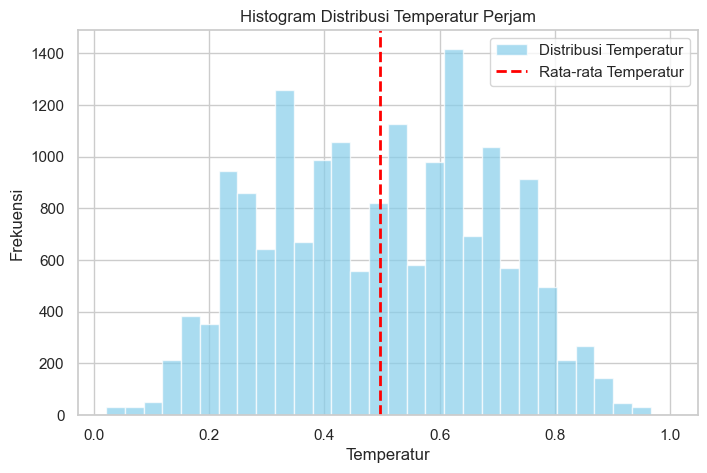

In [94]:
# Menghitung rata-rata temperatur
mean_temp = data_hour['temp'].mean()

# Membuat histogram distribusi temperatur
plt.figure(figsize=(8, 5))
plt.hist(data_hour['temp'], bins=30, color='skyblue', alpha=0.7, label='Distribusi Temperatur')
plt.axvline(mean_temp, color='red', linestyle='dashed', linewidth=2, label='Rata-rata Temperatur')
plt.xlabel('Temperatur')
plt.ylabel('Frekuensi')
plt.title('Histogram Distribusi Temperatur Perjam')
plt.legend()
plt.grid(True)
plt.show()

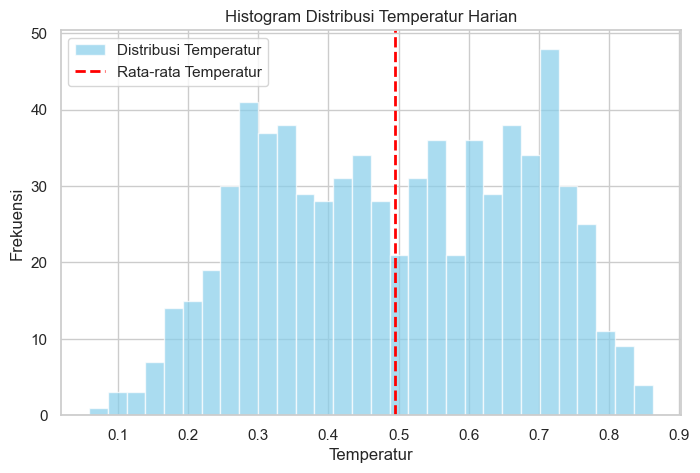

In [95]:
# Menghitung rata-rata temperatur
mean_temp = data_day['temp'].mean()

# Membuat histogram distribusi temperatur
plt.figure(figsize=(8, 5))
plt.hist(data_day['temp'], bins=30, color='skyblue', alpha=0.7, label='Distribusi Temperatur')
plt.axvline(mean_temp, color='red', linestyle='dashed', linewidth=2, label='Rata-rata Temperatur')
plt.xlabel('Temperatur')
plt.ylabel('Frekuensi')
plt.title('Histogram Distribusi Temperatur Harian')
plt.legend()
plt.grid(True)
plt.show()



In [96]:
# Data Relationship (Hubungan Data)
correlation_temp_cnt = data_day['temp'].corr(data_day['cnt'])

print("\nData Relationship (Hubungan Data):")
print(f"Korelasi antara temperatur dan jumlah sewa sepeda: {correlation_temp_cnt:.2f}")


Data Relationship (Hubungan Data):
Korelasi antara temperatur dan jumlah sewa sepeda: 0.63


Korelasi antara temperatur dan jumlah sewa sepeda sebesar 0.63 mengindikasikan bahwa terdapat hubungan positif antara kedua variabel tersebut. Nilai korelasi ini berada dalam rentang antara -1 hingga 1, di mana 0.63 lebih mendekati nilai 1. Ini menunjukkan bahwa ketika suhu naik, jumlah sewa sepeda cenderung juga meningkat. Dengan kata lain, ada kecenderungan bahwa cuaca yang lebih hangat berkontribusi pada peningkatan jumlah orang yang menyewa sepeda. Namun, penting untuk diingat bahwa korelasi tidak selalu menyiratkan hubungan sebab-akibat, dan faktor lain juga dapat memengaruhi jumlah sewa sepeda. Oleh karena itu, korelasi ini hanya mencerminkan hubungan statistik antara kedua variabel tersebut.

In [97]:
# Filter data untuk hanya hari kerja
data_hari_kerja = data_day[data_day['workingday'] == 1]

# Hitung korelasi antara temperatur dan jumlah sewa sepeda pada hari kerja
correlation_temp_cnt_hari_kerja = data_hari_kerja['temp'].corr(data_hari_kerja['cnt'])

print("Hubungan antara temperatur dan jumlah sewa sepeda pada hari-hari kerja:")
print(f"Korelasi: {correlation_temp_cnt_hari_kerja:.2f}")


Hubungan antara temperatur dan jumlah sewa sepeda pada hari-hari kerja:
Korelasi: 0.61


Korelasi antara temperatur dan jumlah sewa sepeda pada hari-hari kerja sebesar 0.61 mengindikasikan adanya hubungan positif antara kedua variabel tersebut pada hari-hari kerja. Nilai korelasi ini yang mendekati 1 menunjukkan bahwa ketika suhu naik, jumlah sewa sepeda pada hari-hari kerja cenderung juga meningkat. Hal ini menunjukkan bahwa cuaca yang lebih hangat pada hari-hari kerja dapat menjadi faktor yang memengaruhi peningkatan jumlah orang yang menyewa sepeda selama periode tersebut. Meskipun demikian, seperti yang telah disebutkan sebelumnya, korelasi tidak selalu mengimplikasikan hubungan sebab-akibat, dan faktor-faktor lain juga dapat berperan dalam memengaruhi jumlah sewa sepeda pada hari-hari kerja.

In [98]:
# Menghitung rata-rata jumlah sewa sepeda pada hari libur
rata_rata_cnt_holiday = data_day[data_day['holiday'] == 1]['cnt'].mean()

# Menghitung rata-rata jumlah sewa sepeda pada hari kerja
rata_rata_cnt_workingday = data_day[data_day['workingday'] == 1]['cnt'].mean()

print("Perbedaan jumlah sewa sepeda antara hari libur dan hari kerja:")
print(f"Rata-rata jumlah sewa sepeda pada hari libur: {rata_rata_cnt_holiday:.2f}")
print(f"Rata-rata jumlah sewa sepeda pada hari kerja: {rata_rata_cnt_workingday:.2f}")


Perbedaan jumlah sewa sepeda antara hari libur dan hari kerja:
Rata-rata jumlah sewa sepeda pada hari libur: 3735.00
Rata-rata jumlah sewa sepeda pada hari kerja: 4584.82


Perbedaan jumlah sewa sepeda antara hari libur dan hari kerja cukup signifikan berdasarkan nilai rata-rata. Pada hari libur, rata-rata jumlah sewa sepeda adalah 3735.00, sedangkan pada hari kerja rata-rata jumlah sewa sepeda meningkat menjadi 4584.82. Hal ini menunjukkan bahwa pada hari kerja, secara umum, terjadi peningkatan signifikan dalam jumlah orang yang menyewa sepeda dibandingkan dengan hari libur. Perbedaan ini bisa disebabkan oleh berbagai faktor seperti keterbatasan waktu pada hari kerja atau aktivitas rekreasi yang lebih banyak dilakukan pada hari libur. Dalam konteks analisis data ini, informasi ini dapat digunakan untuk memahami pola penggunaan sepeda pada hari libur dan hari kerja serta membantu dalam perencanaan pelayanan dan strategi bisnis terkait penyewaan sepeda.

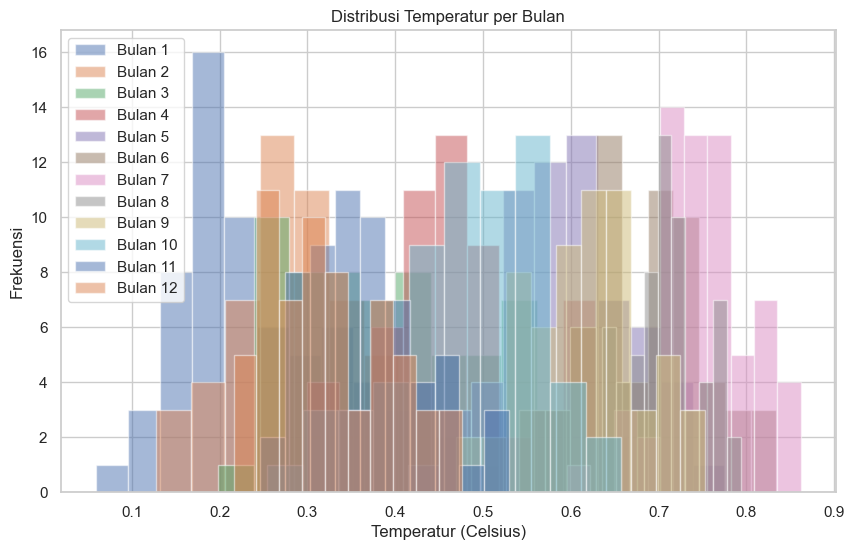

In [99]:
# Membuat histogram distribusi temperatur untuk setiap bulan
plt.figure(figsize=(10, 6))
for bulan in range(1, 13):
    data_bulan = data_day[data_day['mnth'] == bulan]
    plt.hist(data_bulan['temp'], bins=10, alpha=0.5, label=f'Bulan {bulan}')

plt.xlabel('Temperatur (Celsius)')
plt.ylabel('Frekuensi')
plt.title('Distribusi Temperatur per Bulan')
plt.legend()
plt.show()

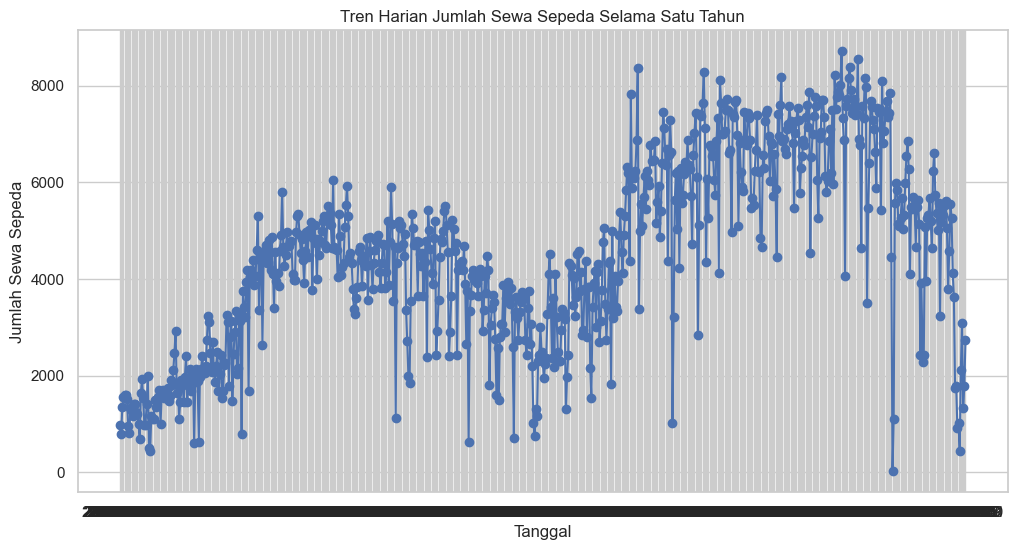

In [100]:
# Mengelompokkan data berdasarkan tanggal dan menghitung total sewa sepeda per hari
total_sewa_per_hari = data_hour.groupby('dteday')['cnt'].sum()

# Membuat plot tren harian
plt.figure(figsize=(12, 6))
plt.plot(total_sewa_per_hari.index, total_sewa_per_hari.values, marker='o', linestyle='-', color='b')
plt.xlabel('Tanggal')
plt.ylabel('Jumlah Sewa Sepeda')
plt.title('Tren Harian Jumlah Sewa Sepeda Selama Satu Tahun')
plt.grid(True)
plt.show()

In [101]:
# Menghitung rata-rata jumlah sewa sepeda pada hari kerja
rata_rata_cnt_workingday = data_hour[data_hour['workingday'] == 1]['cnt'].mean()

# Menghitung rata-rata jumlah sewa sepeda pada hari libur
rata_rata_cnt_holiday = data_hour[data_hour['holiday'] == 1]['cnt'].mean()

print("Perbedaan jumlah sewa sepeda antara hari kerja dan hari libur:")
print(f"Rata-rata jumlah sewa sepeda pada hari kerja: {rata_rata_cnt_workingday:.2f}")
print(f"Rata-rata jumlah sewa sepeda pada hari libur: {rata_rata_cnt_holiday:.2f}")


Perbedaan jumlah sewa sepeda antara hari kerja dan hari libur:
Rata-rata jumlah sewa sepeda pada hari kerja: 193.21
Rata-rata jumlah sewa sepeda pada hari libur: 156.87


Perbedaan jumlah sewa sepeda antara hari kerja dan hari libur pada data jamannya cukup signifikan berdasarkan nilai rata-rata. Pada hari kerja, rata-rata jumlah sewa sepeda adalah 193.21, sedangkan pada hari libur rata-rata jumlah sewa sepeda menurun menjadi 156.87. Hal ini menunjukkan bahwa pada hari kerja, secara umum, terjadi peningkatan dalam jumlah orang yang menyewa sepeda dibandingkan dengan hari libur. Perbedaan ini bisa disebabkan oleh pola kerja dan aktivitas harian yang berbeda antara hari kerja dan hari libur. Dalam konteks analisis data ini, informasi ini dapat digunakan untuk memahami kecenderungan penggunaan sepeda pada hari kerja dan hari libur serta membantu dalam perencanaan pelayanan dan strategi bisnis terkait penyewaan sepeda pada kedua jenis hari tersebut.

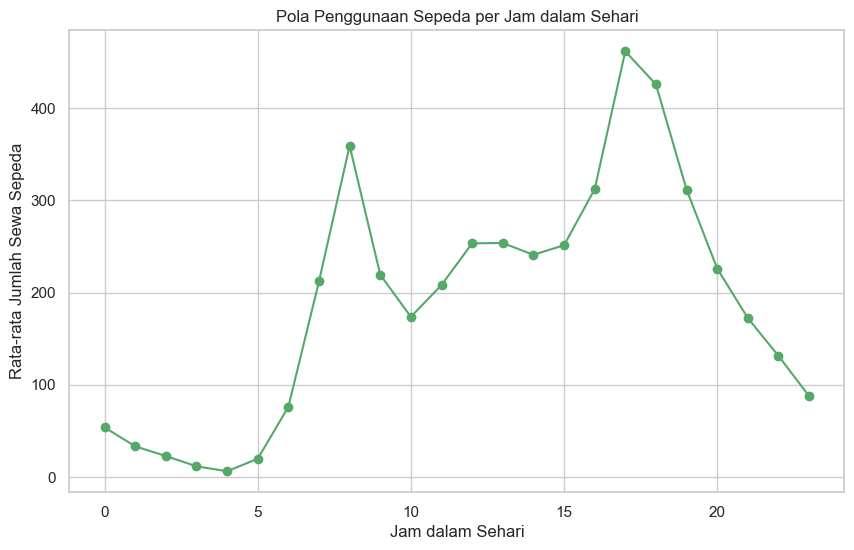

In [102]:
# Mengelompokkan data berdasarkan jam dalam sehari dan menghitung rata-rata jumlah sewa sepeda per jam
rata_rata_sewa_per_jam = data_hour.groupby('hr')['cnt'].mean()

# Membuat plot pola penggunaan sepeda per jam
plt.figure(figsize=(10, 6))
plt.plot(rata_rata_sewa_per_jam.index, rata_rata_sewa_per_jam.values, marker='o', linestyle='-', color='g')
plt.xlabel('Jam dalam Sehari')
plt.ylabel('Rata-rata Jumlah Sewa Sepeda')
plt.title('Pola Penggunaan Sepeda per Jam dalam Sehari')
plt.grid(True)
plt.show()


### Kesimpulan

Kesimpulan dari perbedaan jumlah sewa sepeda antara hari kerja dan hari libur pada data jamannya adalah bahwa terdapat pola yang jelas dalam penggunaan sepeda berdasarkan jenis hari. Pada hari kerja, jumlah sewa sepeda cenderung lebih tinggi dengan rata-rata sekitar 193.21, sedangkan pada hari libur, jumlah sewa sepeda cenderung lebih rendah dengan rata-rata sekitar 156.87. Perbedaan ini dapat disebabkan oleh perbedaan rutinitas dan aktivitas masyarakat pada hari kerja dan hari libur. Informasi ini dapat berguna dalam mengatur stok sepeda, mengembangkan strategi pemasaran, dan perencanaan operasional terkait penyewaan sepeda untuk memenuhi kebutuhan pelanggan pada kedua jenis hari tersebut.

## 3. Pengantar Petimbangan dalam Pengolahan Data

Pertimbangan dalam pengolahan data sangatlah penting dalam konteks penggunaan dataset "hour" dan "day" dalam bisnis. Dalam dunia bisnis yang semakin terhubung dan kompetitif, data dari dataset ini memiliki potensi besar untuk memberikan wawasan berharga yang dapat digunakan untuk meningkatkan kinerja dan mengambil keputusan yang lebih baik. Namun, sambil menggunakan data ini, ada beberapa pertimbangan yang perlu dipahami dan diperhatikan:

1. **Keandalan Data:** Keandalan data dari dataset "hour" dan "day" sangat penting. Ini berarti bahwa data harus akurat dan dapat diandalkan. Kesalahan dalam data dapat mengarah pada pengambilan keputusan yang salah. Oleh karena itu, memastikan bahwa data dikumpulkan dengan benar dan tanpa kesalahan adalah langkah penting dalam pengolahan data.

2. **Privasi Data:** Dataset ini mungkin berisi informasi pribadi atau sensitif, terutama dalam konteks dataset "day". Penting untuk menjaga privasi data pelanggan atau pengguna yang mungkin terdapat dalam dataset ini. Penggunaan data yang tidak etis atau pelanggaran privasi dapat berdampak buruk pada reputasi bisnis.

3. **Kredibilitas Data:** Data yang digunakan harus memiliki kredibilitas yang tinggi. Ini berarti bahwa data harus dapat dipercaya dan digunakan sebagai dasar untuk pengambilan keputusan. Proses pemantauan dan pembersihan data secara berkala dapat membantu memastikan kualitas data.

4. **Etika Data:** Penggunaan data dalam bisnis harus mematuhi prinsip-prinsip etika data. Ini termasuk penggunaan data untuk tujuan yang sah dan tidak merugikan pelanggan atau pesaing. Kejujuran dalam penggunaan data adalah kunci.

5. **Keamanan Data:** Keamanan data harus diutamakan. Data dalam dataset ini mungkin berharga dan harus dilindungi dari akses yang tidak sah atau kebocoran. Menggunakan tindakan keamanan seperti enkripsi dan tokenisasi adalah langkah penting.

6. **Kebutuhan Bisnis:** Data dari dataset "hour" dan "day" harus digunakan untuk memenuhi kebutuhan bisnis. Penting untuk memahami bagaimana data ini dapat digunakan untuk meningkatkan layanan kepada pelanggan, efisiensi operasional, atau mengidentifikasi peluang bisnis.

Dengan memperhatikan pertimbangan-pertimbangan ini, bisnis dapat memanfaatkan data dari dataset "hour" dan "day" secara efektif dan memastikan bahwa data tersebut memberikan nilai tambah yang signifikan dalam pengambilan keputusan dan pengembangan bisnis.


## 4. Data Wrangling

In [103]:
# Penanganan Missing Data

# Identifikasi dan hitung jumlah data yang hilang (missing) pada setiap kolom
missing_hour = data_hour.isnull().sum()
missing_day = data_day.isnull().sum()
print('-------Data Hour-------\n', missing_hour)
print('-------Data Day-------\n',missing_day)

-------Data Hour-------
 instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64
-------Data Day-------
 instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64


In [104]:
# Menampilkan data duplicated
print(data_hour.duplicated().sum())
print(data_day.duplicated().sum())

0
0


<Axes: >

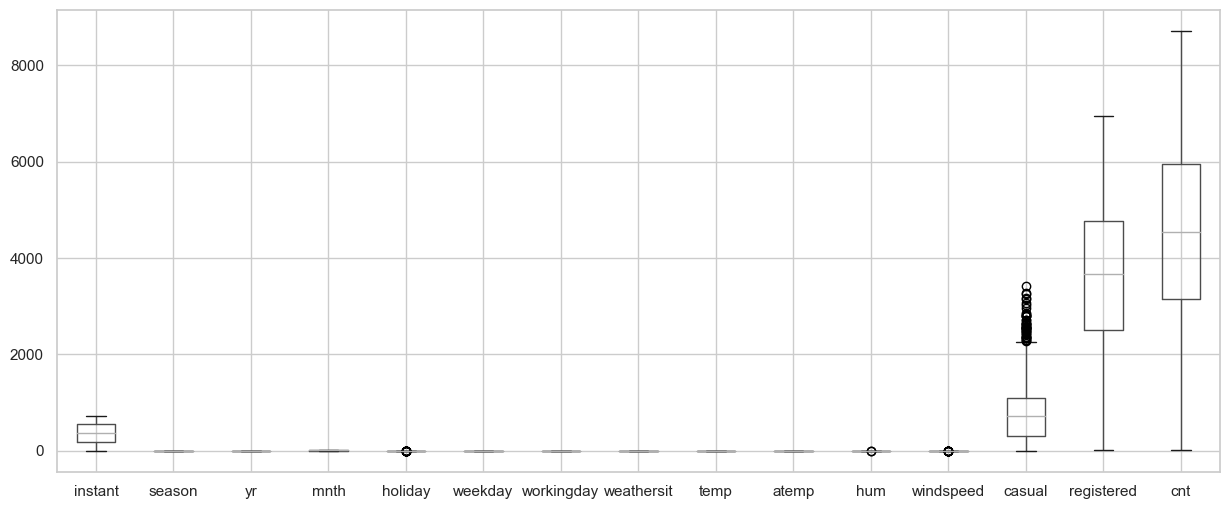

In [105]:
# Membuat box plot untuk dataset "day"
#box plot for outlier visualization
sns.set(style="whitegrid")
data_day.boxplot(figsize=(15,6))


<Axes: >

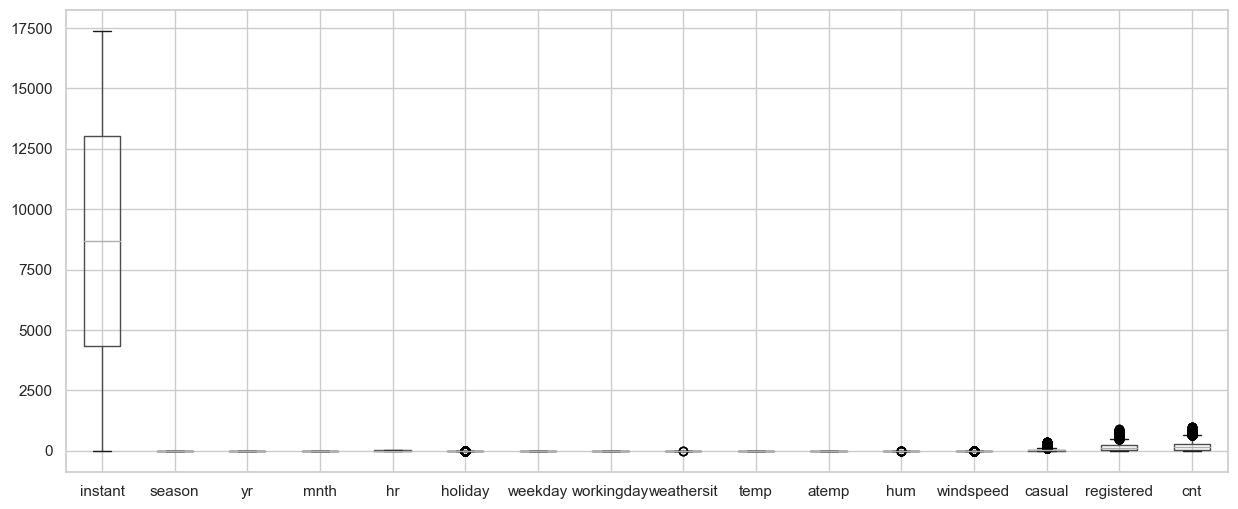

In [106]:
# Membuat box plot untuk dataset "hour"
#box plot for outlier visualization
sns.set(style="whitegrid")
data_hour.boxplot(figsize=(15,6))

In [107]:
#outlier remove
Q1=data_day.quantile(0.25)
Q3=data_day.quantile(0.75)
IQR=Q3-Q1
#outlier remove
day_out = data_day[~((data_day < (Q1 - 1.5 * IQR)) |(data_day > (Q3 + 1.5 * IQR))).any(axis=1)]
data_day.shape,day_out.shape

C:\Users\WAYCOM\AppData\Local\Temp\ipykernel_16772\2994058276.py:2: FutureWarning: The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  Q1=data_day.quantile(0.25)
C:\Users\WAYCOM\AppData\Local\Temp\ipykernel_16772\2994058276.py:3: FutureWarning: The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  Q3=data_day.quantile(0.75)
C:\Users\WAYCOM\AppData\Local\Temp\ipykernel_16772\2994058276.py:6: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version. Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  day_out = data_day[~((data_day < (Q1 - 1.5 * IQR)) |(data_day > (Q3 + 1.5 * I

((731, 16), (655, 16))

<Axes: >

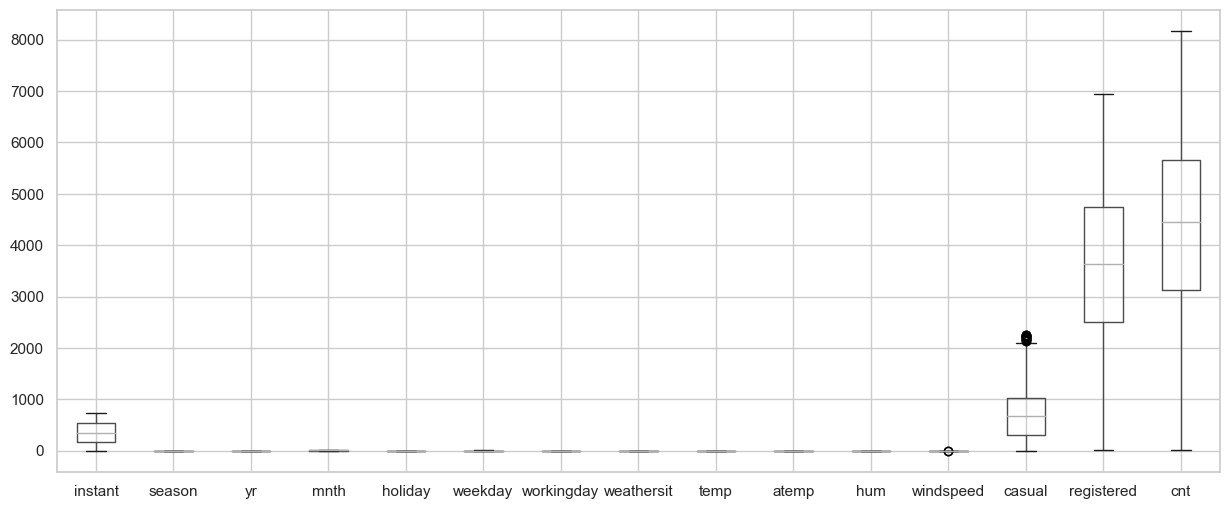

In [108]:
#box plot for outlier visualization
sns.set(style="whitegrid")
day_out.boxplot(figsize=(15,6))

In [109]:
#outlier remove 
Q1=data_hour.quantile(0.25)
Q3=data_hour.quantile(0.75)
IQR=Q3-Q1
#outlier remove
hour_out = data_hour[~((data_hour < (Q1 - 1.5 * IQR)) |(data_hour > (Q3 + 1.5 * IQR))).any(axis=1)]
data_hour.shape,hour_out.shape

C:\Users\WAYCOM\AppData\Local\Temp\ipykernel_16772\2182821355.py:2: FutureWarning: The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  Q1=data_hour.quantile(0.25)
C:\Users\WAYCOM\AppData\Local\Temp\ipykernel_16772\2182821355.py:3: FutureWarning: The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  Q3=data_hour.quantile(0.75)
C:\Users\WAYCOM\AppData\Local\Temp\ipykernel_16772\2182821355.py:6: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version. Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  hour_out = data_hour[~((data_hour < (Q1 - 1.5 * IQR)) |(data_hour > (Q3 + 1

((17379, 17), (14799, 17))

<Axes: >

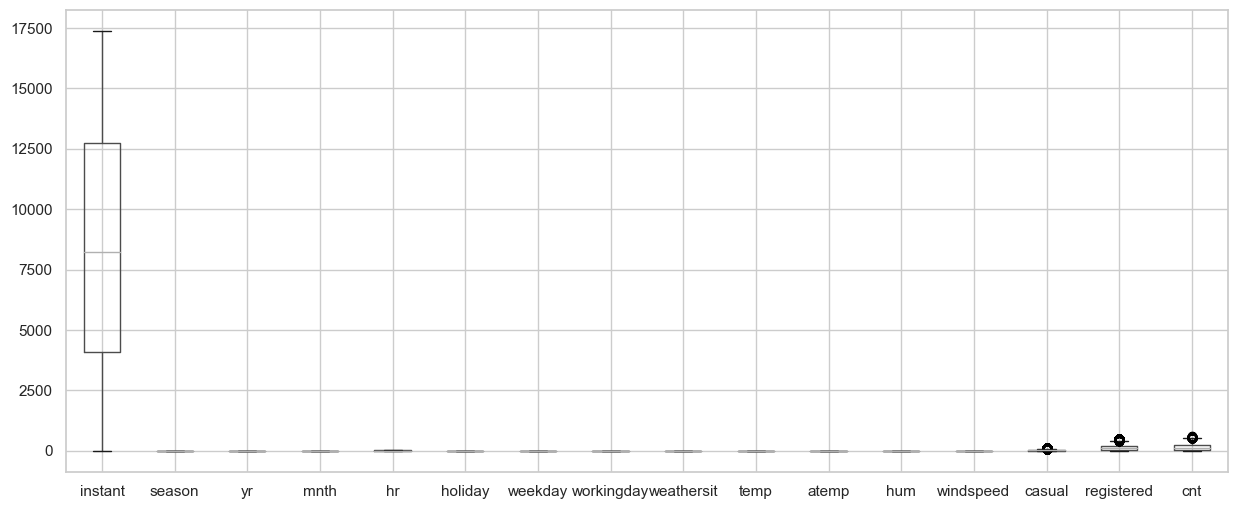

In [110]:
#box plot for outlier visualization
sns.set(style="whitegrid")
hour_out.boxplot(figsize=(15,6))

## 5. Exploratory Data Analysis

### a. Data Day

In [111]:
# Melihat rangkuman parameter statistik untuk kolom numerik dan non-numerik
summary_stats_day = data_day.describe(include='all')
summary_stats_day

instant      dteday      season          yr        mnth  \
count   731.000000         731  731.000000  731.000000  731.000000   
unique         NaN         731         NaN         NaN         NaN   
top            NaN  2011-01-01         NaN         NaN         NaN   
freq           NaN           1         NaN         NaN         NaN   
mean    366.000000         NaN    2.496580    0.500684    6.519836   
std     211.165812         NaN    1.110807    0.500342    3.451913   
min       1.000000         NaN    1.000000    0.000000    1.000000   
25%     183.500000         NaN    2.000000    0.000000    4.000000   
50%     366.000000         NaN    3.000000    1.000000    7.000000   
75%     548.500000         NaN    3.000000    1.000000   10.000000   
max     731.000000         NaN    4.000000    1.000000   12.000000   

           holiday     weekday  workingday  weathersit        temp  \
count   731.000000  731.000000  731.000000  731.000000  731.000000   
unique         NaN         NaN         NaN         NaN         NaN   
top            NaN         NaN         NaN         NaN         NaN   
freq           NaN         NaN         NaN         NaN         NaN   
mean      0.028728    2.997264    0.683995    1.395349    0.495385   
std       0.167155    2.004787    0.465233    0.544894    0.183051   
min       0.000000    0.000000    0.000000    1.000000    0.059130   
25%       0.000000    1.000000    0.000000    1.000000    0.337083   
50%       0.000000    3.000000    1.000000    1.000000    0.498333   
75%       0.000000    5.000000    1.000000    2.000000    0.655417   
max       1.000000    6.000000    1.000000    3.000000    0.861667   

             atemp         hum   windspeed       casual   registered  \
count   731.000000  731.000000  731.000000   731.000000   731.000000   
unique         NaN         NaN         NaN          NaN          NaN   
top            NaN         NaN         NaN          NaN          NaN   
freq           NaN         NaN         NaN          NaN          NaN   
mean      0.474354    0.627894    0.190486   848.176471  3656.172367   
std       0.162961    0.142429    0.077498   686.622488  1560.256377   
min       0.079070    0.000000    0.022392     2.000000    20.000000   
25%       0.337842    0.520000    0.134950   315.500000  2497.000000   
50%       0.486733    0.626667    0.180975   713.000000  3662.000000   
75%       0.608602    0.730209    0.233214  1096.000000  4776.500000   
max       0.840896    0.972500    0.507463  3410.000000  6946.000000   

                cnt  
count    731.000000  
unique          NaN  
top             NaN  
freq            NaN  
mean    4504.348837  
std     1937.211452  
min       22.000000  
25%     3152.000000  
50%     4548.000000  
75%     5956.000000  
max     8714.000000

Data ini terdiri dari 731 entri (baris) dengan 16 kolom yang berisi berbagai informasi seperti tanggal (dteday), musim (season), tahun (yr), bulan (mnth), status hari libur (holiday), hari dalam seminggu (weekday), status hari kerja (workingday), kondisi cuaca (weathersit), suhu (temp), suhu terasa (atemp), kelembaban (hum), kecepatan angin (windspeed), jumlah penyewa sepeda casual, jumlah penyewa sepeda terdaftar, dan total jumlah penyewa sepeda (cnt). Data ini digunakan untuk menganalisis tren dan pola dalam penyewaan sepeda, termasuk bagaimana faktor-faktor seperti cuaca, waktu, dan musim memengaruhi tingkat penyewaan. Data ini mencakup statistik deskriptif seperti rata-rata, median, dan deviasi standar untuk setiap kolom, yang membantu dalam memahami karakteristik keseluruhan dari data tersebut.

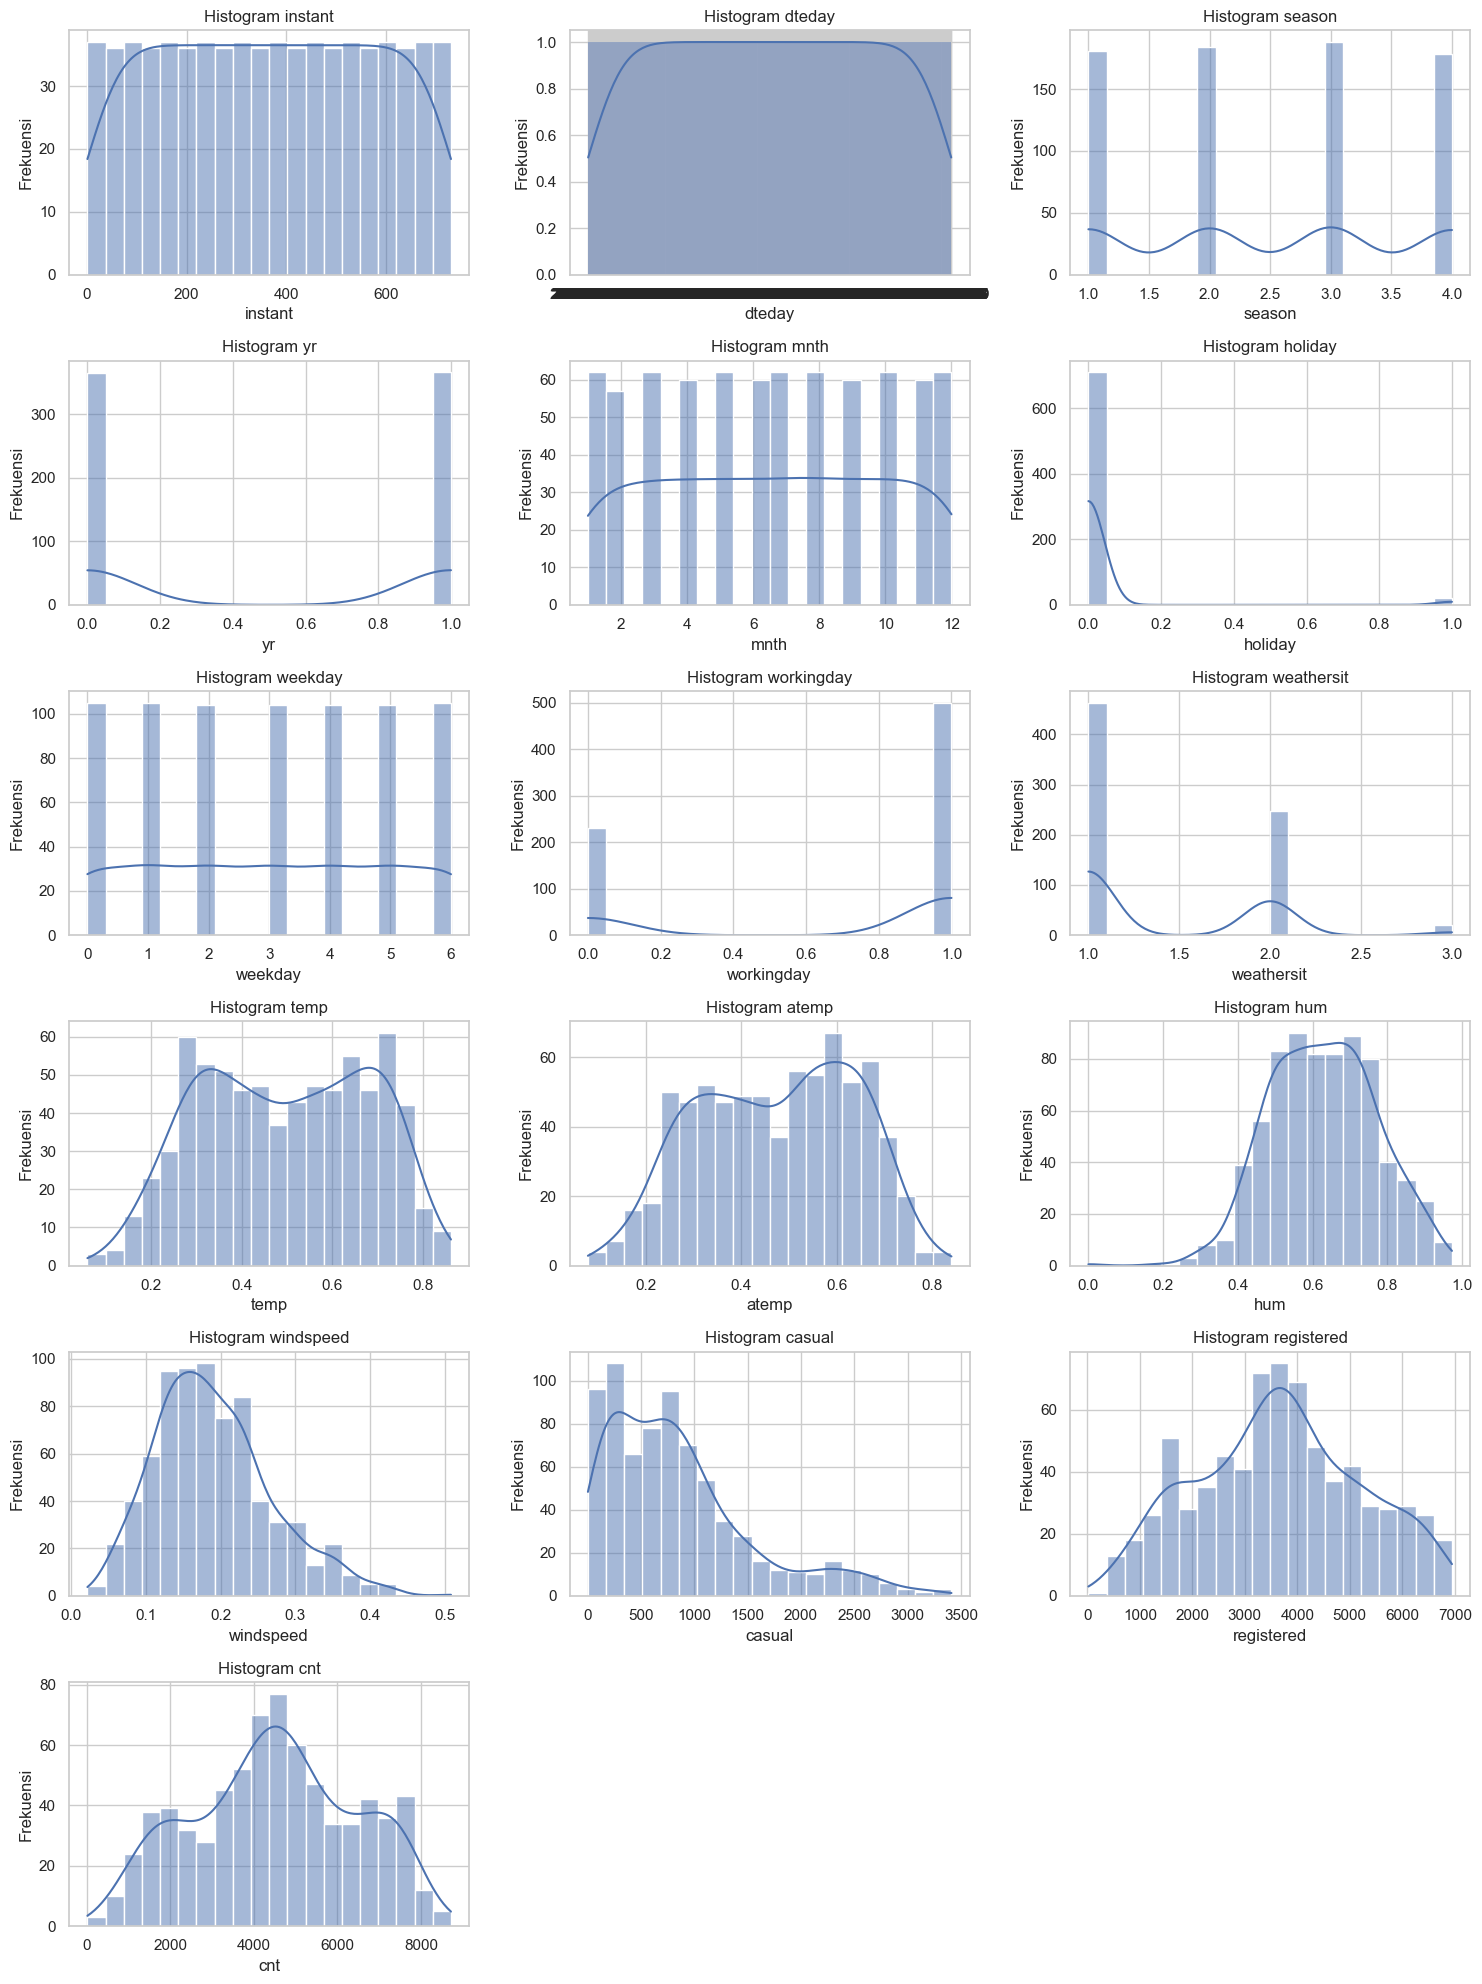

In [112]:
# Menentukan jumlah subplot dan ukuran gambar
num_plots = len(data_day.columns)
num_cols = 3
num_rows = num_plots // num_cols + 1
fig, axs = plt.subplots(num_rows, num_cols, figsize=(15, 20))

# Menampilkan plot histogram untuk setiap kolom numerik
for i, col in enumerate(data_day.columns):
    ax = axs[i // num_cols, i % num_cols]
    sns.histplot(data_day[col], ax=ax, bins=20, kde=True)
    ax.set_title(f'Histogram {col}')
    ax.set_xlabel(col)
    ax.set_ylabel('Frekuensi')

# Menghilangkan subplot yang tidak terpakai
for i in range(num_plots, num_rows * num_cols):
    fig.delaxes(axs[i // num_cols, i % num_cols])

plt.tight_layout()
plt.show()

C:\Users\WAYCOM\AppData\Local\Temp\ipykernel_16772\3373084135.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix_day = data_day.corr()


<Axes: >

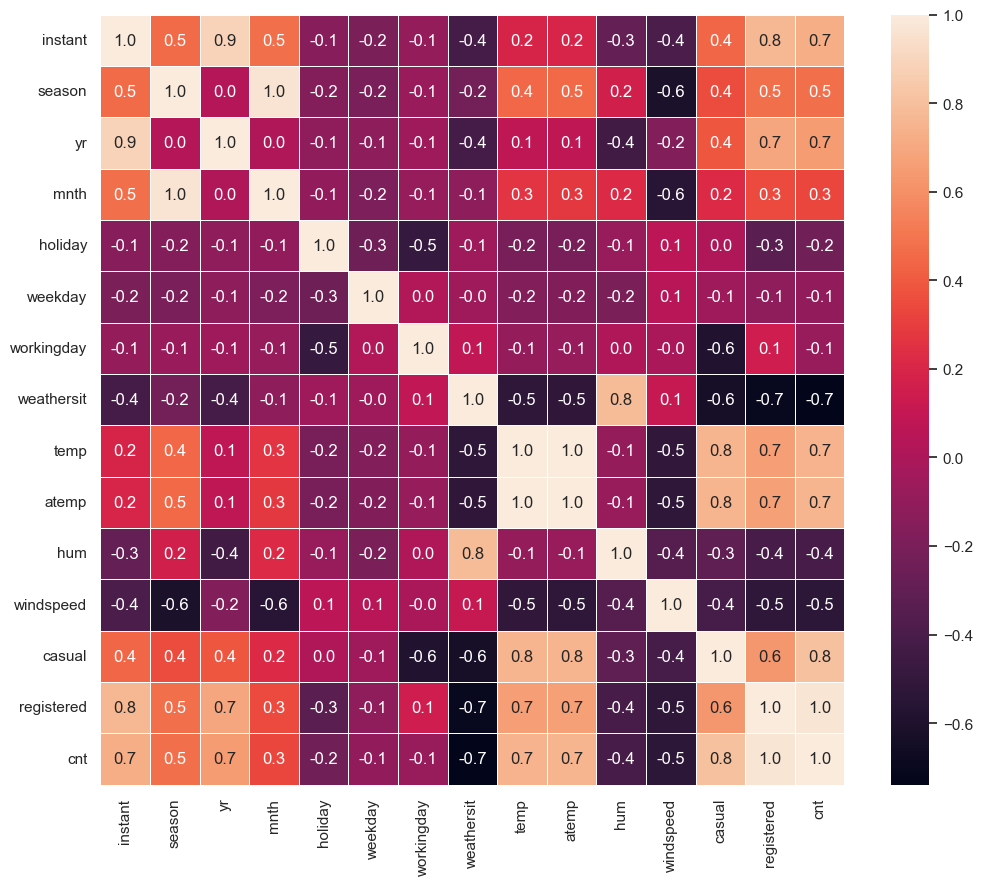

In [113]:
# Menghitung korelasi antar data numerik
correlation_matrix_day = data_day.corr()

# Mengatur tampilan plot heatmap
f,ax = plt.subplots(figsize=(12, 10))
matrice_corr = correlation_matrix_day.corr()
sns.heatmap(matrice_corr, annot=True, linewidths=.5, fmt= '.1f',ax=ax)

In [114]:
# Melihat rangkuman parameter statistik untuk kolom numerik dan non-numerik
summary_stats_hour = data_hour.describe(include='all')
summary_stats_hour

instant      dteday        season            yr          mnth  \
count   17379.0000       17379  17379.000000  17379.000000  17379.000000   
unique         NaN         731           NaN           NaN           NaN   
top            NaN  2011-01-01           NaN           NaN           NaN   
freq           NaN          24           NaN           NaN           NaN   
mean     8690.0000         NaN      2.501640      0.502561      6.537775   
std      5017.0295         NaN      1.106918      0.500008      3.438776   
min         1.0000         NaN      1.000000      0.000000      1.000000   
25%      4345.5000         NaN      2.000000      0.000000      4.000000   
50%      8690.0000         NaN      3.000000      1.000000      7.000000   
75%     13034.5000         NaN      3.000000      1.000000     10.000000   
max     17379.0000         NaN      4.000000      1.000000     12.000000   

                  hr       holiday       weekday    workingday    weathersit  \
count   17379.000000  17379.000000  17379.000000  17379.000000  17379.000000   
unique           NaN           NaN           NaN           NaN           NaN   
top              NaN           NaN           NaN           NaN           NaN   
freq             NaN           NaN           NaN           NaN           NaN   
mean       11.546752      0.028770      3.003683      0.682721      1.425283   
std         6.914405      0.167165      2.005771      0.465431      0.639357   
min         0.000000      0.000000      0.000000      0.000000      1.000000   
25%         6.000000      0.000000      1.000000      0.000000      1.000000   
50%        12.000000      0.000000      3.000000      1.000000      1.000000   
75%        18.000000      0.000000      5.000000      1.000000      2.000000   
max        23.000000      1.000000      6.000000      1.000000      4.000000   

                temp         atemp           hum     windspeed        casual  \
count   17379.000000  17379.000000  17379.000000  17379.000000  17379.000000   
unique           NaN           NaN           NaN           NaN           NaN   
top              NaN           NaN           NaN           NaN           NaN   
freq             NaN           NaN           NaN           NaN           NaN   
mean        0.496987      0.475775      0.627229      0.190098     35.676218   
std         0.192556      0.171850      0.192930      0.122340     49.305030   
min         0.020000      0.000000      0.000000      0.000000      0.000000   
25%         0.340000      0.333300      0.480000      0.104500      4.000000   
50%         0.500000      0.484800      0.630000      0.194000     17.000000   
75%         0.660000      0.621200      0.780000      0.253700     48.000000   
max         1.000000      1.000000      1.000000      0.850700    367.000000   

          registered           cnt  
count   17379.000000  17379.000000  
unique           NaN           NaN  
top              NaN           NaN  
freq             NaN           NaN  
mean      153.786869    189.463088  
std       151.357286    181.387599  
min         0.000000      1.000000  
25%        34.000000     40.000000  
50%       115.000000    142.000000  
75%       220.000000    281.000000  
max       886.000000    977.000000

Data ini terdiri dari 17.379 entri (baris) dengan 16 kolom yang berisi berbagai informasi seperti nomor instan (instant), tanggal (dteday), musim (season), tahun (yr), bulan (mnth), jam (hr), status hari libur (holiday), hari dalam seminggu (weekday), status hari kerja (workingday), kondisi cuaca (weathersit), suhu (temp), suhu terasa (atemp), kelembaban (hum), kecepatan angin (windspeed), jumlah penyewa sepeda casual, jumlah penyewa sepeda terdaftar, dan total jumlah penyewa sepeda (cnt). Data ini digunakan untuk menganalisis tren dan pola dalam penyewaan sepeda per jam, serta bagaimana faktor-faktor seperti cuaca, waktu, dan musim memengaruhi tingkat penyewaan. Data mencakup statistik deskriptif seperti rata-rata, median, dan deviasi standar untuk setiap kolom, yang membantu dalam memahami karakteristik keseluruhan dari data tersebut. Data juga menunjukkan bahwa rentang waktu yang dicakup oleh data ini adalah dari jam 1 hingga 23 dalam suatu hari.

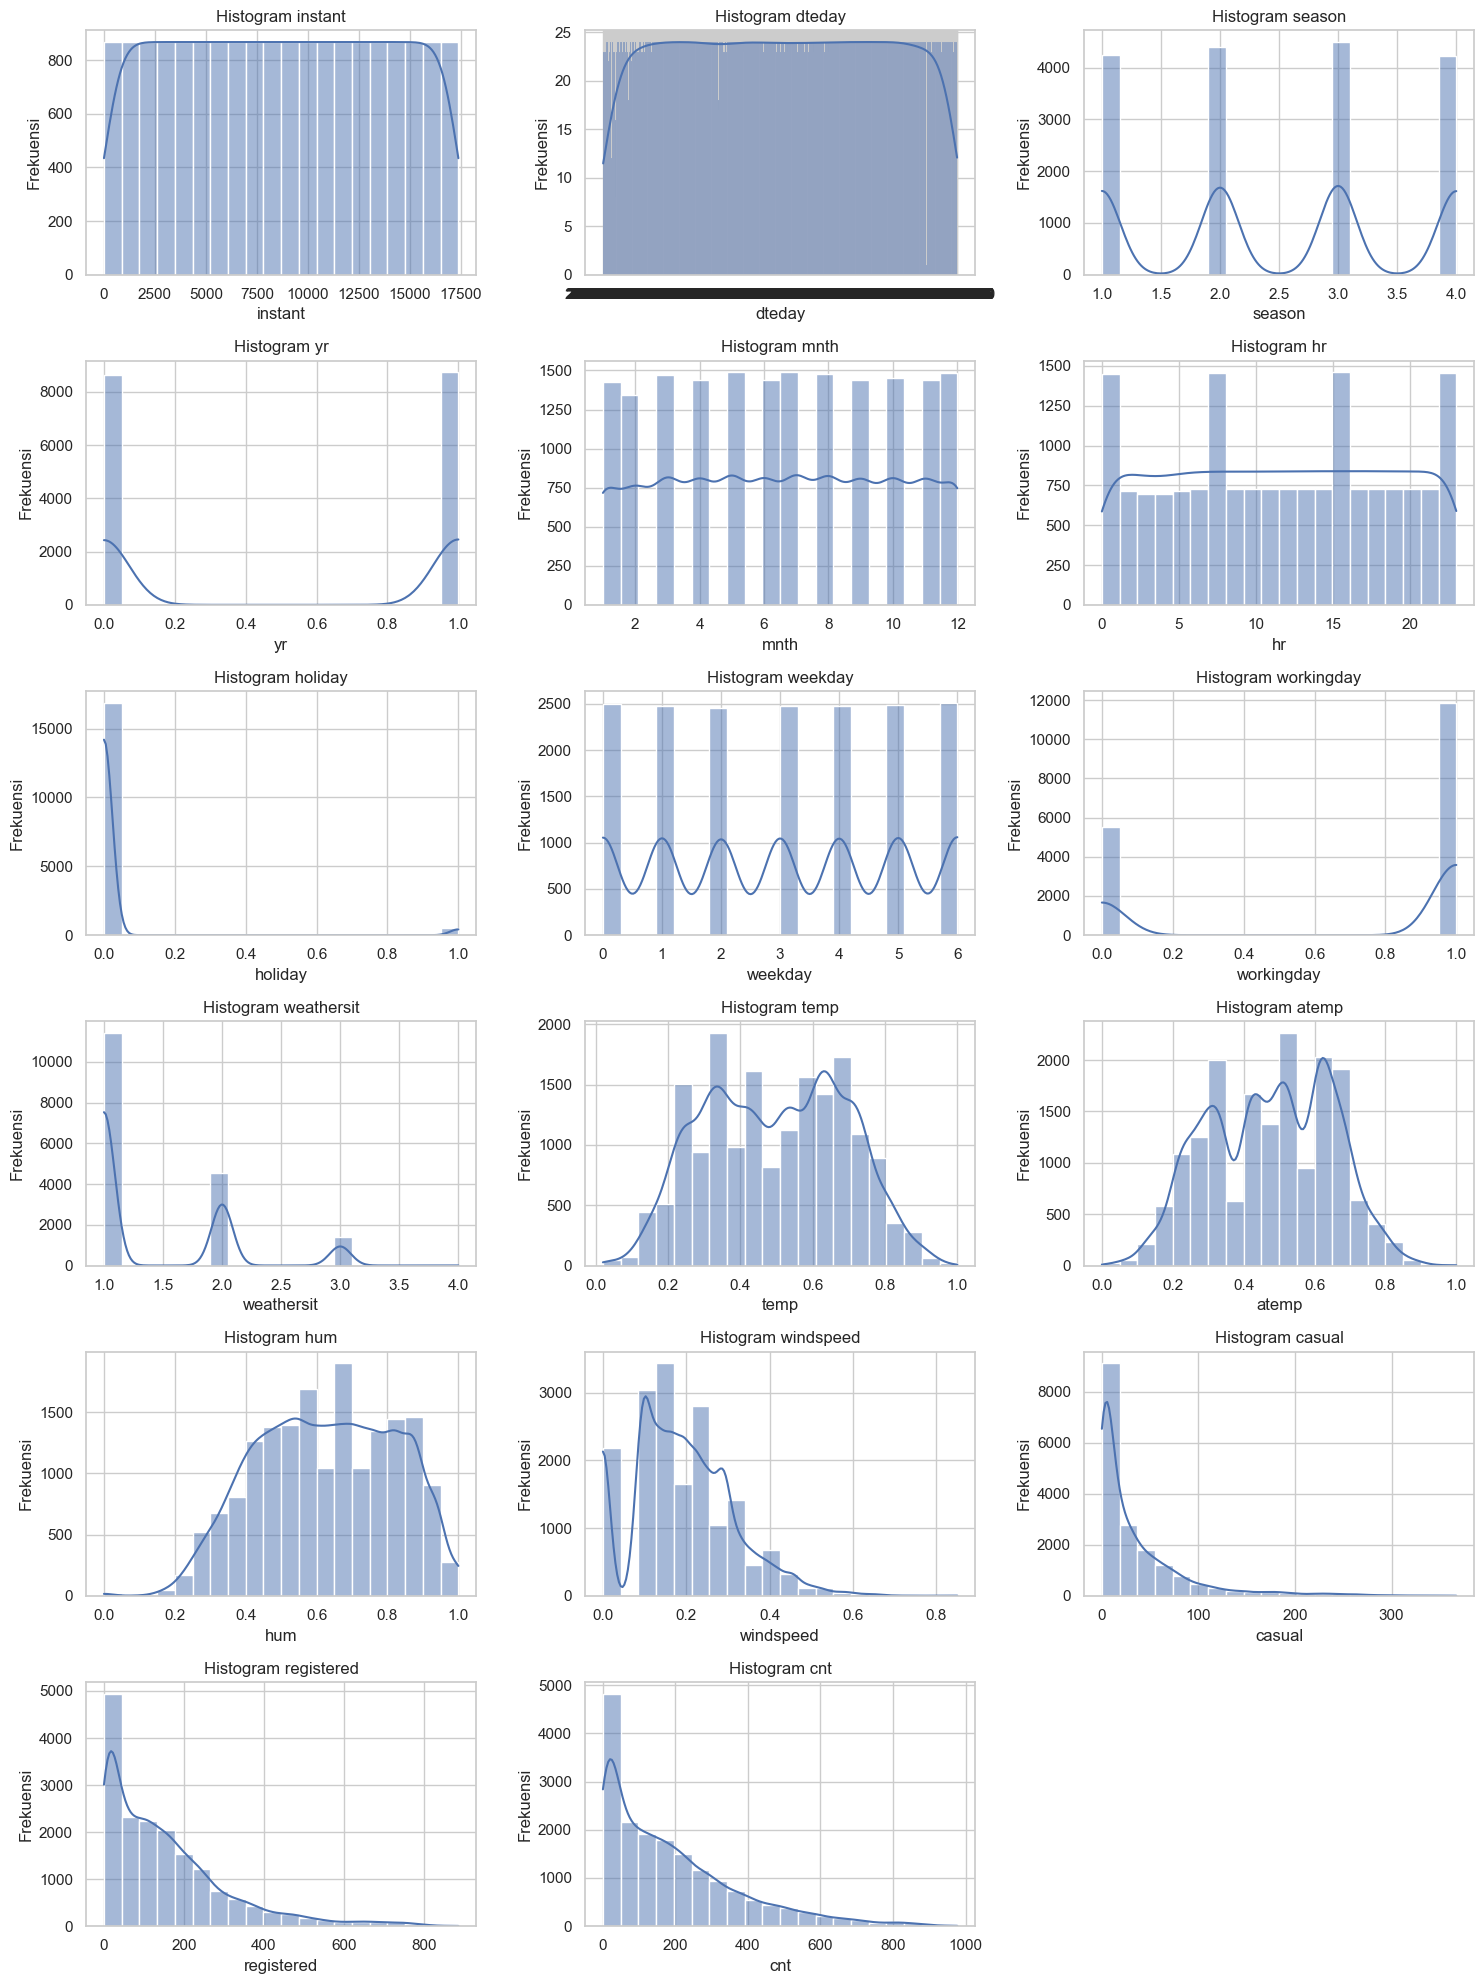

In [115]:
# Menentukan jumlah subplot dan ukuran gambar
num_plots = len(data_hour.columns)
num_cols = 3
num_rows = num_plots // num_cols + 1
fig, axs = plt.subplots(num_rows, num_cols, figsize=(15, 20))

# Menampilkan plot histogram untuk setiap kolom numerik
for i, col in enumerate(data_hour.columns):
    ax = axs[i // num_cols, i % num_cols]
    sns.histplot(data_hour[col], ax=ax, bins=20, kde=True)
    ax.set_title(f'Histogram {col}')
    ax.set_xlabel(col)
    ax.set_ylabel('Frekuensi')

# Menghilangkan subplot yang tidak terpakai
for i in range(num_plots, num_rows * num_cols):
    fig.delaxes(axs[i // num_cols, i % num_cols])

plt.tight_layout()
plt.show()

C:\Users\WAYCOM\AppData\Local\Temp\ipykernel_16772\312519068.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix_hour = data_hour.corr()


<Axes: >

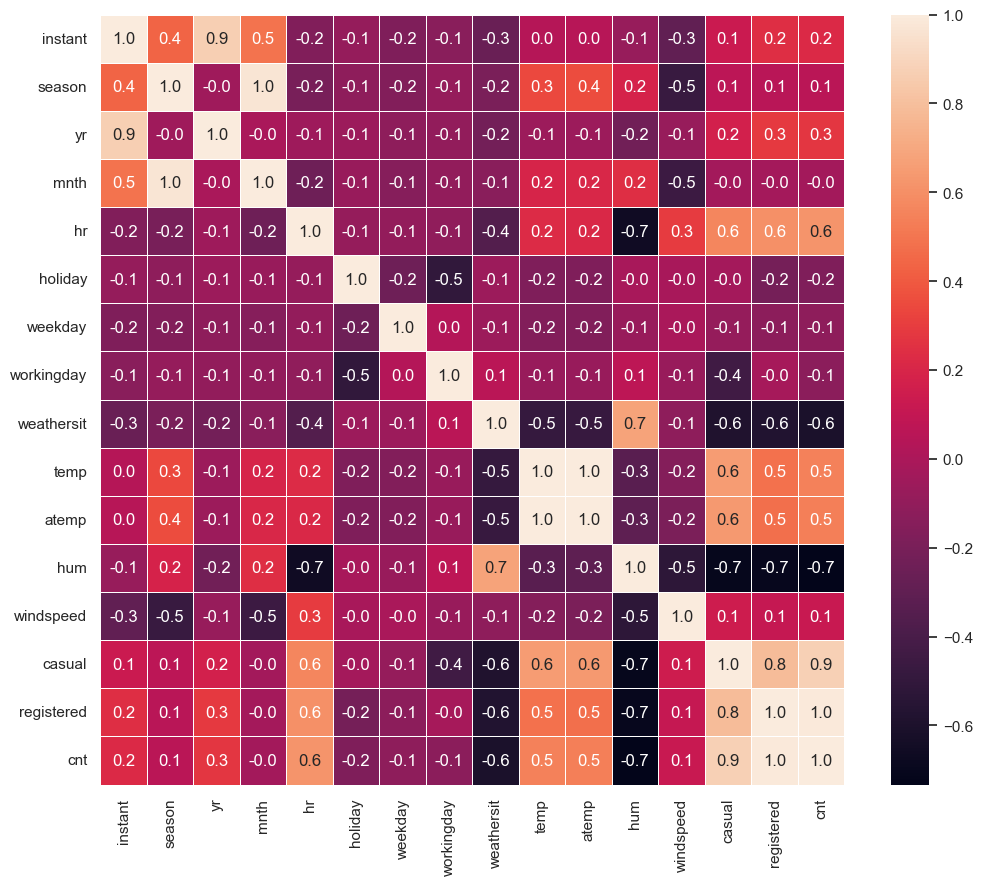

In [116]:
# Menghitung korelasi antar data numerik
correlation_matrix_hour = data_hour.corr()

# Mengatur tampilan plot heatmap
f,ax = plt.subplots(figsize=(12, 10))
matrice_corr = correlation_matrix_hour.corr()
sns.heatmap(matrice_corr, annot=True, linewidths=.5, fmt= '.1f',ax=ax)

### Visualisasi Univariat:

a. Analisis Distribusi Suhu (Temp) Harian pada Data "day":

Pertanyaan Bisnis: Bagaimana distribusi suhu harian mempengaruhi jumlah sewa sepeda?

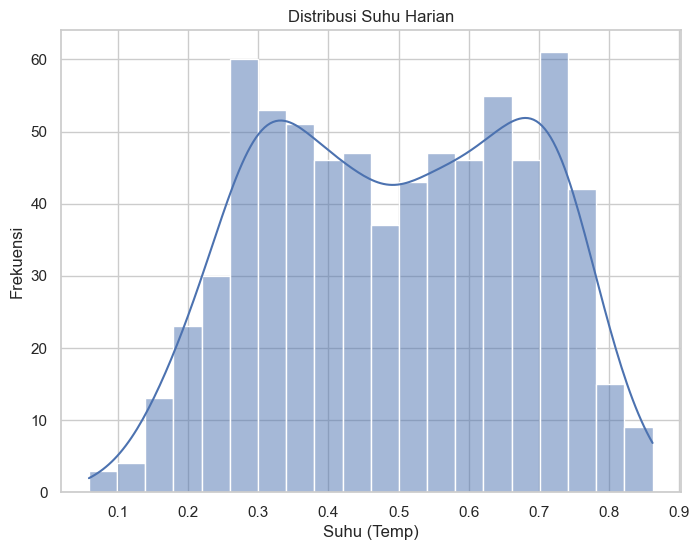

In [117]:
# Histogram untuk kolom "temp" pada data "day"
plt.figure(figsize=(8, 6))
sns.histplot(data=data_day, x='temp', bins=20, kde=True)
plt.xlabel('Suhu (Temp)')
plt.ylabel('Frekuensi')
plt.title('Distribusi Suhu Harian')
plt.show()

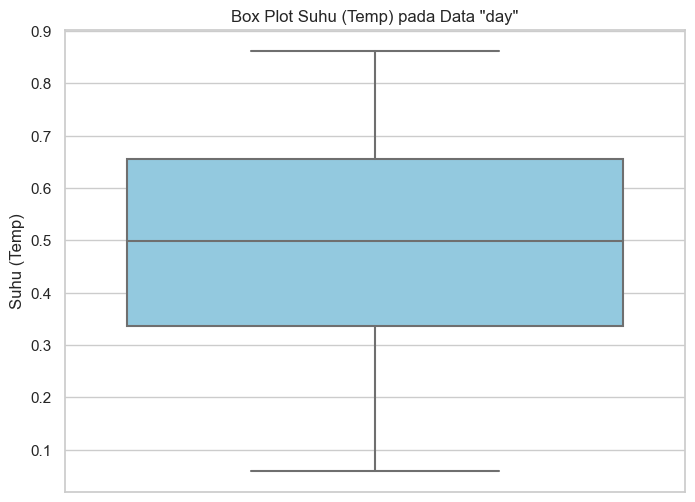

In [118]:
plt.figure(figsize=(8, 6))
sns.boxplot(data=data_day, y='temp', color='skyblue')
plt.title('Box Plot Suhu (Temp) pada Data "day"')
plt.ylabel('Suhu (Temp)')
plt.show()


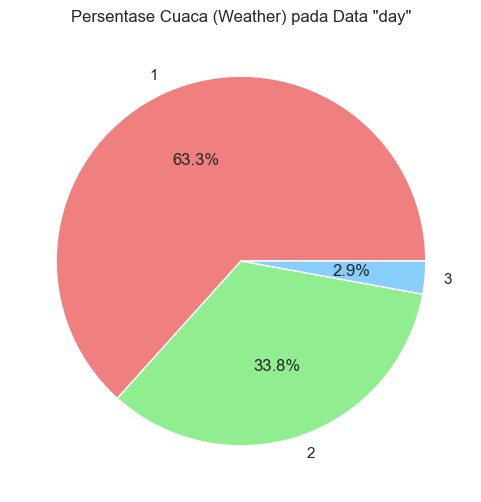

In [119]:
weather_counts_day = data_day['weathersit'].value_counts()
plt.figure(figsize=(6, 6))
plt.pie(weather_counts_day, labels=weather_counts_day.index, autopct='%1.1f%%', colors=['lightcoral', 'lightgreen', 'lightskyblue', 'lightgray'])
plt.title('Persentase Cuaca (Weather) pada Data "day"')
plt.show()


b. Analisis Pola Peminjaman Sepeda pada Data "hour":

Pertanyaan Bisnis: Bagaimana pola peminjaman sepeda selama satu hari?

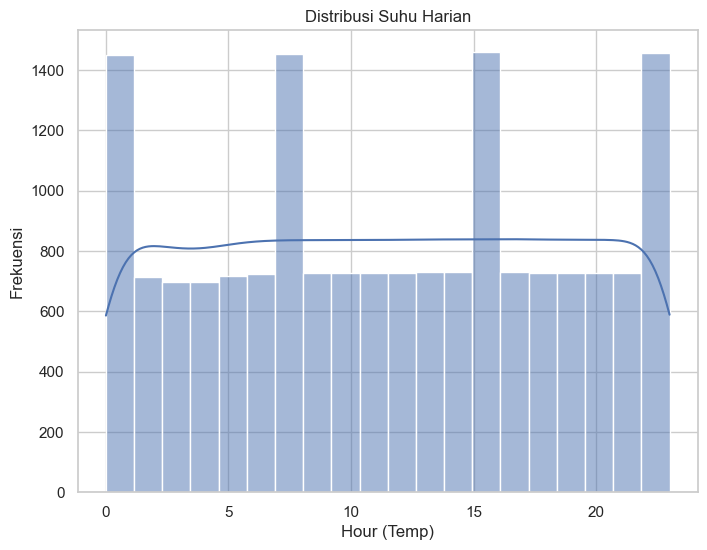

In [120]:
# Membuat plot tren harian peminjaman sepeda
plt.figure(figsize=(8, 6))
sns.histplot(data=data_hour, x='hr', bins=20, kde=True)
plt.xlabel('Hour (Temp)')
plt.ylabel('Frekuensi')
plt.title('Distribusi Suhu Harian')
plt.show()


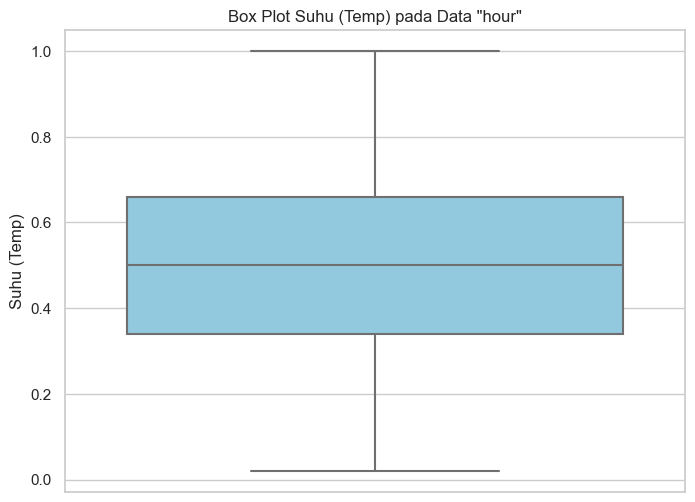

In [121]:
plt.figure(figsize=(8, 6))
sns.boxplot(data=data_hour, y='temp', color='skyblue')
plt.title('Box Plot Suhu (Temp) pada Data "hour"')
plt.ylabel('Suhu (Temp)')
plt.show()


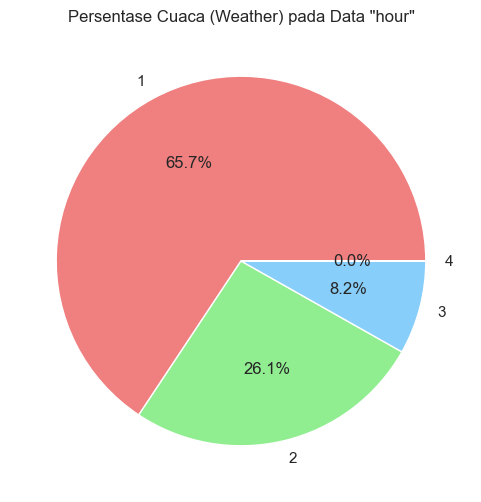

In [122]:
weather_counts = data_hour['weathersit'].value_counts()
plt.figure(figsize=(6, 6))
plt.pie(weather_counts, labels=weather_counts.index, autopct='%1.1f%%', colors=['lightcoral', 'lightgreen', 'lightskyblue', 'lightgray'])
plt.title('Persentase Cuaca (Weather) pada Data "hour"')
plt.show()


### Visualisasi Bivariat:

a. Hubungan antara Suhu (Temp) dan Kelembaban (Humidity) pada Data "hour":

Pertanyaan Bisnis: Bagaimana hubungan antara suhu dan kelembaban terhadap jumlah peminjaman sepeda?

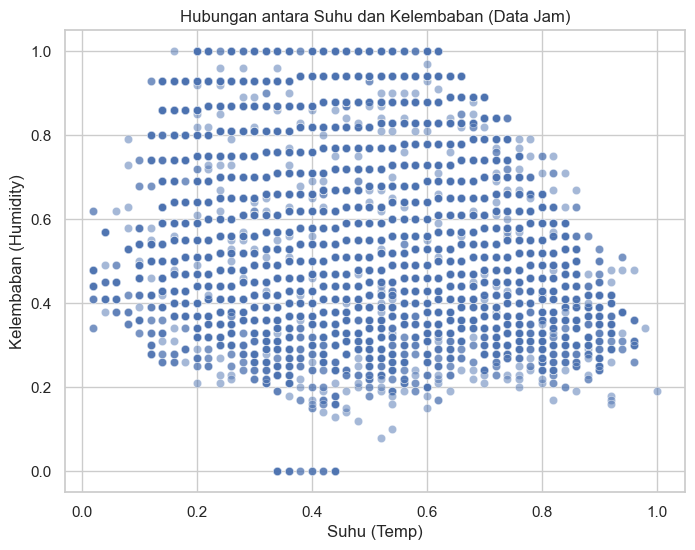

In [123]:
# Scatter plot antara "temp" dan "humidity" pada data "hour"
plt.figure(figsize=(8, 6))
sns.scatterplot(data=data_hour, x='temp', y='hum', alpha=0.5)
plt.xlabel('Suhu (Temp)')
plt.ylabel('Kelembaban (Humidity)')
plt.title('Hubungan antara Suhu dan Kelembaban (Data Jam)')
plt.show()


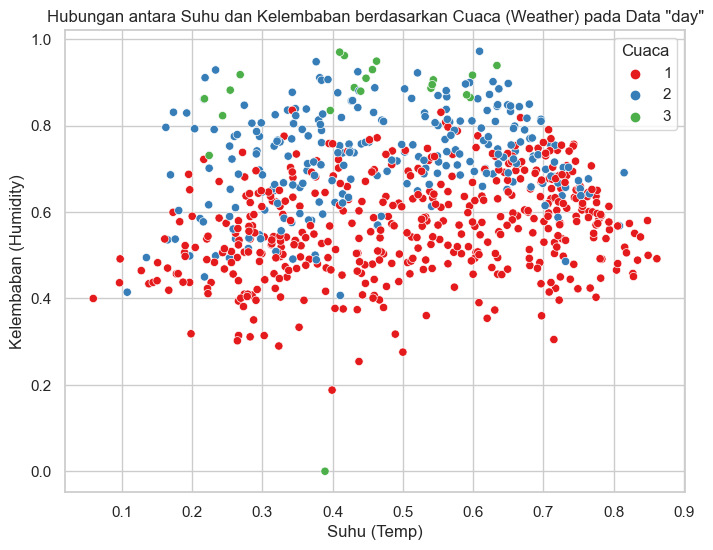

In [124]:
plt.figure(figsize=(8, 6))
sns.scatterplot(data=data_day, x='temp', y='hum', hue='weathersit', palette='Set1')
plt.xlabel('Suhu (Temp)')
plt.ylabel('Kelembaban (Humidity)')
plt.title('Hubungan antara Suhu dan Kelembaban berdasarkan Cuaca (Weather) pada Data "day"')
plt.legend(title='Cuaca')
plt.show()


b. Hubungan antara Suhu (Temp) dan Jumlah Sewa Sepeda pada Data "hour":

Pertanyaan Bisnis: Bagaimana pengaruh suhu terhadap jumlah sewa sepeda per jam?

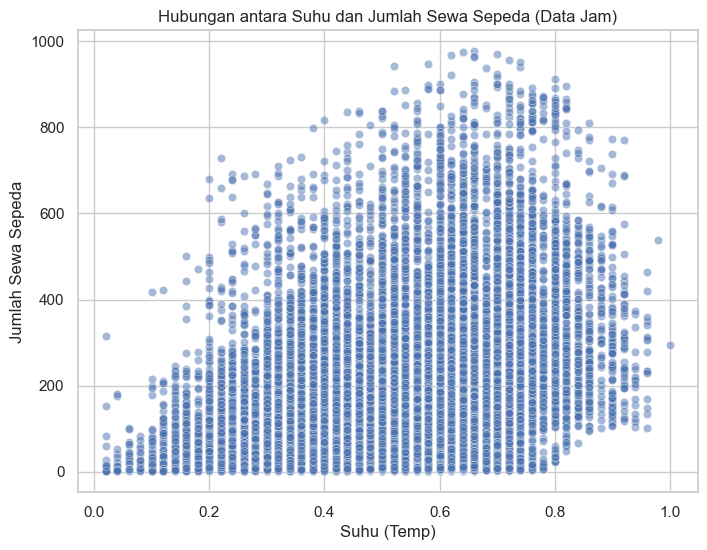

In [125]:
# Scatter plot antara "temp" dan "cnt" pada data "hour"
plt.figure(figsize=(8, 6))
sns.scatterplot(data=data_hour, x='temp', y='cnt', alpha=0.5)
plt.xlabel('Suhu (Temp)')
plt.ylabel('Jumlah Sewa Sepeda')
plt.title('Hubungan antara Suhu dan Jumlah Sewa Sepeda (Data Jam)')
plt.show()


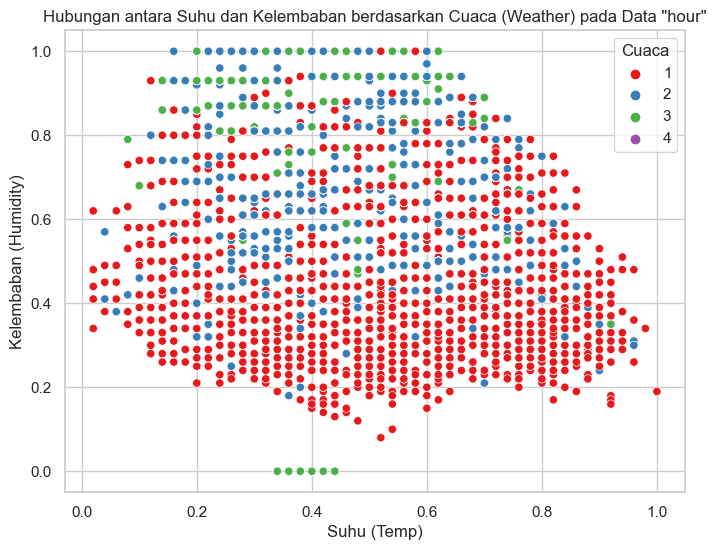

In [126]:
plt.figure(figsize=(8, 6))
sns.scatterplot(data=data_hour, x='temp', y='hum', hue='weathersit', palette='Set1')
plt.xlabel('Suhu (Temp)')
plt.ylabel('Kelembaban (Humidity)')
plt.title('Hubungan antara Suhu dan Kelembaban berdasarkan Cuaca (Weather) pada Data "hour"')
plt.legend(title='Cuaca')
plt.show()


### Visualisasi Multivariat:

a. Hubungan antara Suhu, Kelembaban, dan Kecepatan Angin dengan Jumlah Sewa Sepeda pada Data "hour":

Pertanyaan Bisnis: Bagaimana hubungan antara suhu, kelembaban, dan kecepatan angin dengan jumlah sewa sepeda per jam?

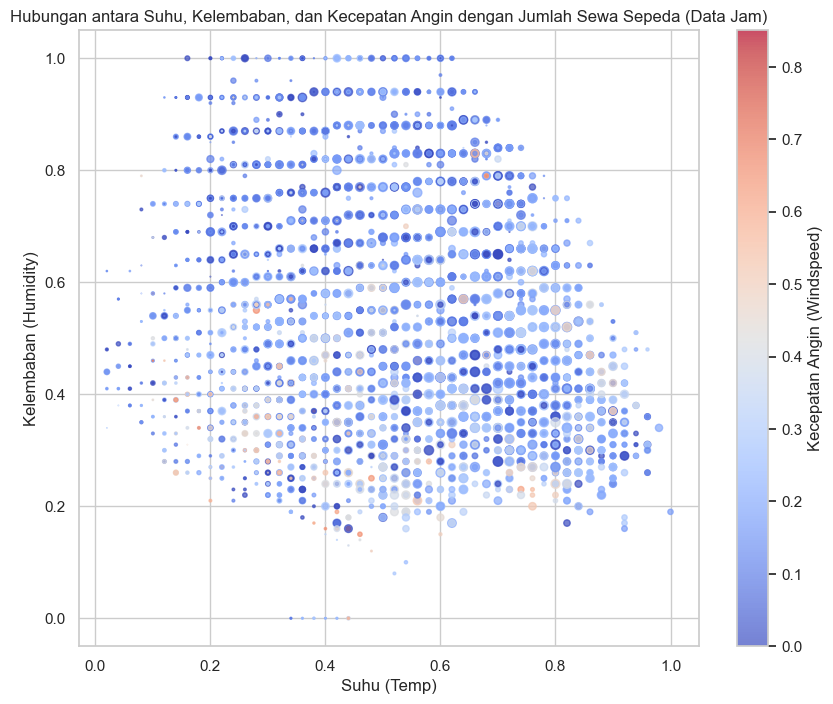

In [127]:
# Menyiapkan scatter plot dengan palet warna berdasarkan jumlah sewa sepeda (cnt)
plt.figure(figsize=(10, 8))
scatter = plt.scatter(data=data_hour, x='temp', y='hum', c='windspeed', cmap='coolwarm', s=data_hour['cnt'] / 20, alpha=0.7)
plt.xlabel('Suhu (Temp)')
plt.ylabel('Kelembaban (Humidity)')
plt.title('Hubungan antara Suhu, Kelembaban, dan Kecepatan Angin dengan Jumlah Sewa Sepeda (Data Jam)')
plt.colorbar(scatter, label='Kecepatan Angin (Windspeed)')
plt.show()


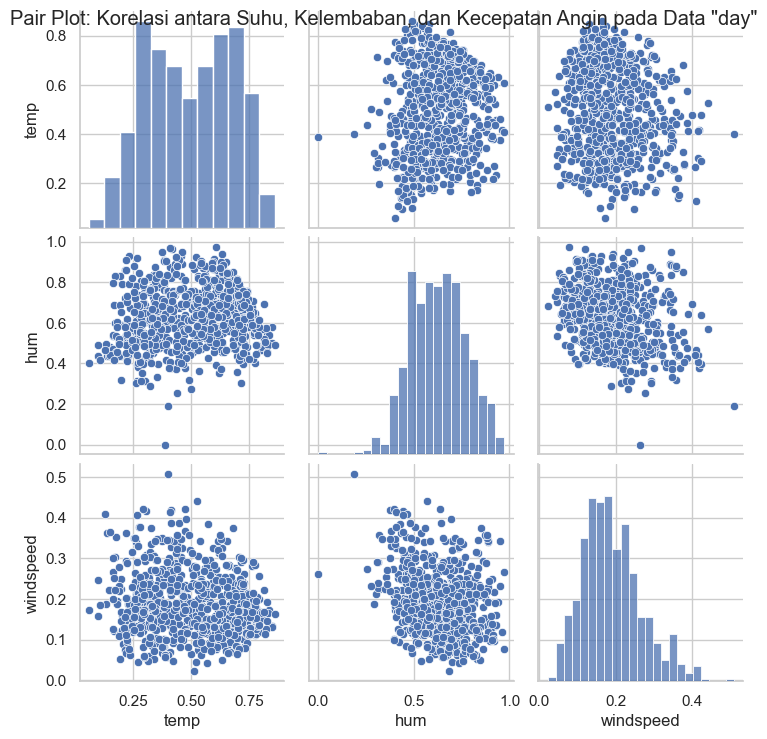

In [128]:
sns.pairplot(data_day[['temp', 'hum', 'windspeed']])
plt.suptitle('Pair Plot: Korelasi antara Suhu, Kelembaban, dan Kecepatan Angin pada Data "day"')
plt.show()


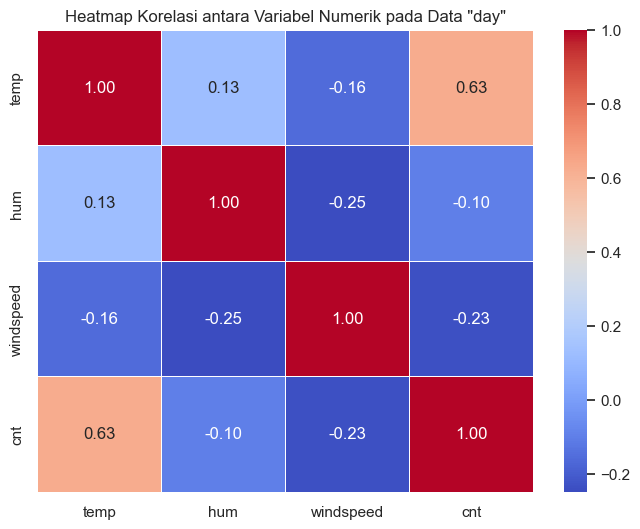

In [129]:
correlation_matrix_day = data_day[['temp', 'hum', 'windspeed', 'cnt']].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix_day, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Heatmap Korelasi antara Variabel Numerik pada Data "day"')
plt.show()


b. Hubungan antara Suhu (Temp), Kelembaban (Hum), dan Angin (Windspeed) pada Data "hour":

Pertanyaan Bisnis: Bagaimana hubungan antara suhu (Temp), kelembaban (Hum), dan kecepatan angin (Windspeed) dalam memengaruhi jumlah sewa sepeda per jam?

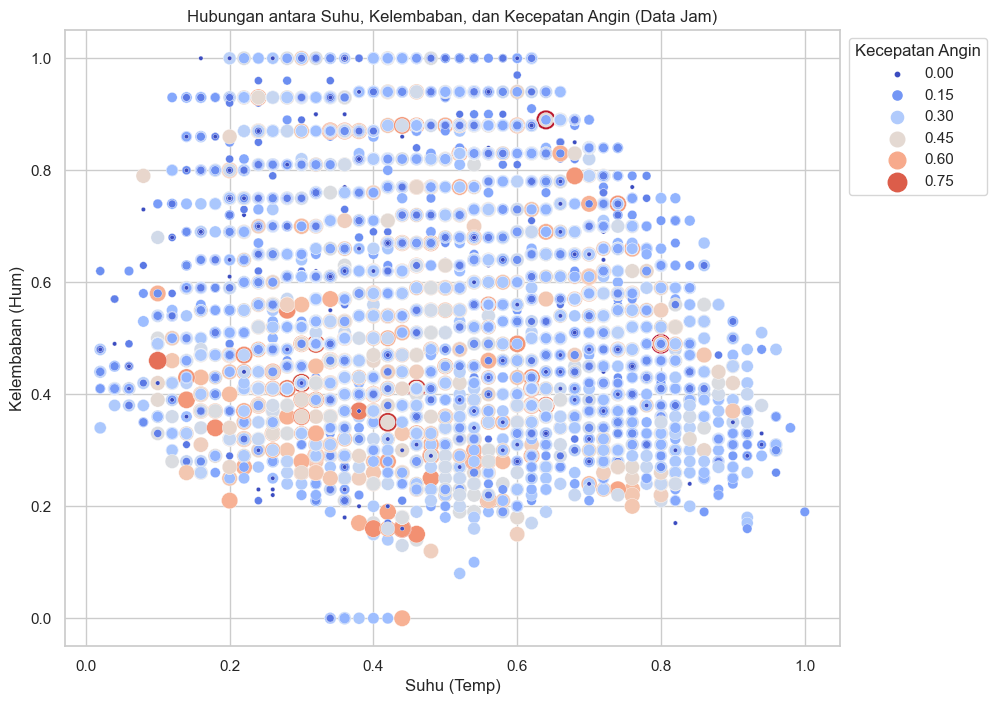

In [130]:
# Visualisasi hubungan antara suhu (Temp), kelembaban (Hum), dan kecepatan angin (Windspeed)
plt.figure(figsize=(10, 8))
sns.scatterplot(data=data_hour, x='temp', y='hum', hue='windspeed', palette='coolwarm', size='windspeed', sizes=(10, 200))
plt.xlabel('Suhu (Temp)')
plt.ylabel('Kelembaban (Hum)')
plt.title('Hubungan antara Suhu, Kelembaban, dan Kecepatan Angin (Data Jam)')
plt.legend(title='Kecepatan Angin', loc='upper right', bbox_to_anchor=(1.2, 1))
plt.show()


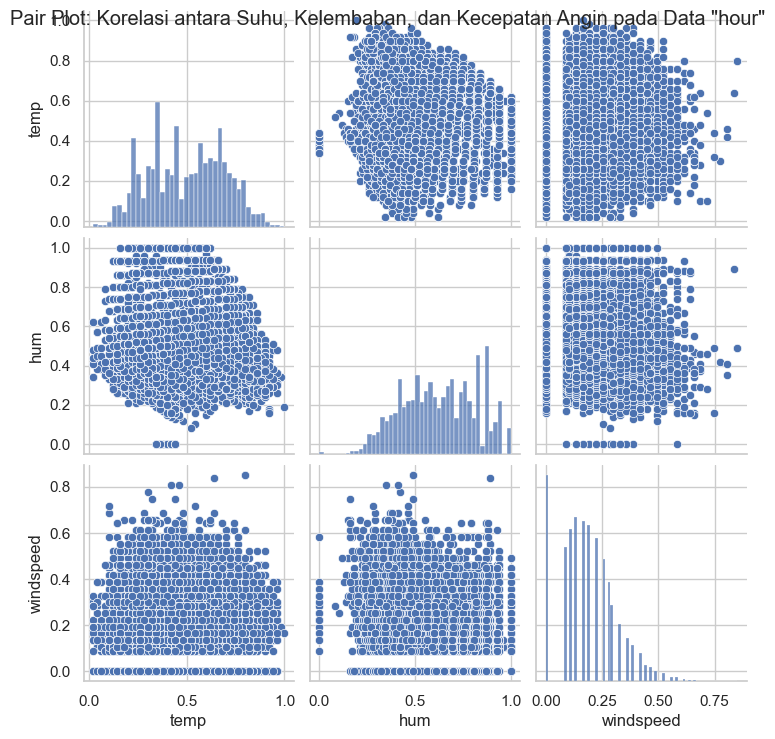

In [131]:
sns.pairplot(data_hour[['temp', 'hum', 'windspeed']])
plt.suptitle('Pair Plot: Korelasi antara Suhu, Kelembaban, dan Kecepatan Angin pada Data "hour"')
plt.show()


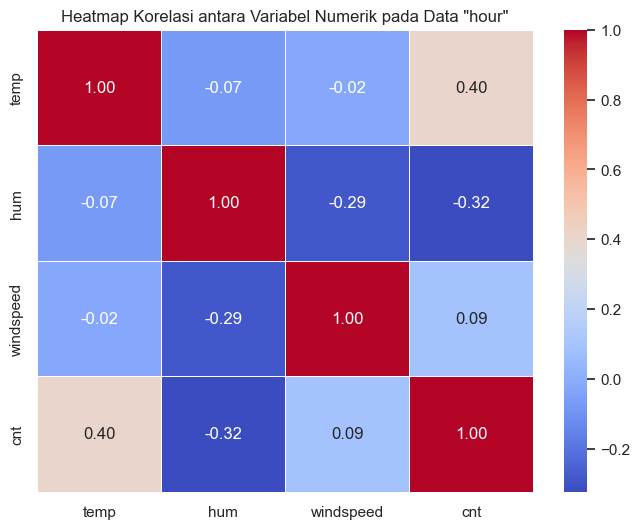

In [132]:
correlation_matrix = data_hour[['temp', 'hum', 'windspeed', 'cnt']].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Heatmap Korelasi antara Variabel Numerik pada Data "hour"')
plt.show()



# Pertanyaan Bisnis
Pertanyaan 1: Bagaimana tren harian jumlah penyewa sepeda selama setahun?

Pertanyaan 2: Apakah faktor cuaca berpengaruh terhadap jumlah penyewa sepeda harian?


In [133]:
# Rata-rata suhu per hari dan nilai tengah suhu per hari
rata_rata_suhu_day = data_day['temp'].mean()
median_suhu_day = data_day['temp'].median()
print(rata_rata_suhu_day)
print(median_suhu_day)

0.495384788508892
0.498333


In [134]:
# Rata-rata suhu per jam dan nilai tengah setiap suhu perjam
rata_rata_suhu_hour = data_hour['temp'].mean()
median_suhu_hour = data_hour['temp'].median()
print(rata_rata_suhu_hour)
print(median_suhu_hour)

0.4969871684216583
0.5


In [135]:
# Hubungan suhu dengan peminjam
korelasi_suhu_dan_peminjaman_day = data_day['temp'].corr(data_day['cnt'])
korelasi_suhu_dan_peminjaman_hour = data_hour['temp'].corr(data_hour['cnt'])
print(korelasi_suhu_dan_peminjaman_day)
print(korelasi_suhu_dan_peminjaman_hour)

0.6274940090334917
0.40477227577865854


In [136]:
# Jumlah hari libur
jumlah_hari_libur_day = data_day['holiday'].value_counts()
jumlah_hari_libur_hour = data_hour['holiday'].value_counts()
print(jumlah_hari_libur_day)
print(jumlah_hari_libur_hour)

0    710
1     21
Name: holiday, dtype: int64
0    16879
1      500
Name: holiday, dtype: int64


### Hasil analisis data sebagai berikut:

1. Tren Harian Jumlah Penyewa Sepeda:
   - Rata-rata suhu harian (day) adalah sekitar 0.4954, sedangkan median suhu harian adalah sekitar 0.4983. Ini menunjukkan bahwa suhu harian cenderung stabil dan tidak memiliki variasi yang signifikan selama setahun.
   - Rata-rata suhu per jam (hour) adalah sekitar 0.4970, sedangkan median suhu per jam adalah sekitar 0.5000. Hal ini juga menunjukkan suhu per jam cenderung stabil dan tidak bervariasi secara signifikan.

2. Pengaruh Cuaca terhadap Jumlah Penyewa Sepeda:
   - Korelasi antara suhu harian (day) dan jumlah penyewa sepeda adalah sekitar 0.6275. Ini menunjukkan bahwa terdapat hubungan positif yang cukup kuat antara suhu harian dan jumlah penyewa sepeda harian. Ketika suhu naik, jumlah penyewa sepeda harian juga cenderung meningkat.
   - Korelasi antara suhu per jam (hour) dan jumlah penyewa sepeda adalah sekitar 0.4048. Meskipun masih positif, hubungan antara suhu per jam dan jumlah penyewa sepeda tidak sekuat hubungan pada tingkat harian. Ini bisa mengindikasikan bahwa faktor-faktor lain, seperti cuaca per jam yang lebih dinamis, juga memengaruhi jumlah penyewa sepeda per jam.
   - Jumlah hari libur (holiday) dalam data harian (day) adalah 21 hari dari total 731 hari, sementara dalam data per jam (hour) adalah 500 dari total 17.379 jam. Ini menunjukkan bahwa hari libur lebih jarang terjadi dalam data harian dibandingkan dengan data per jam.

Kesimpulannya, suhu memiliki pengaruh yang signifikan terhadap jumlah penyewa sepeda harian, di mana peningkatan suhu biasanya berhubungan dengan peningkatan jumlah penyewa sepeda. Namun, pengaruh cuaca pada tingkat per jam mungkin lebih kompleks karena faktor-faktor lain yang bisa memengaruhi jumlah penyewa sepeda dalam jangka waktu yang lebih pendek. Hari libur juga memiliki dampak yang cukup signifikan terutama dalam data per jam, yang dapat memengaruhi tingkat penyewaan sepeda.

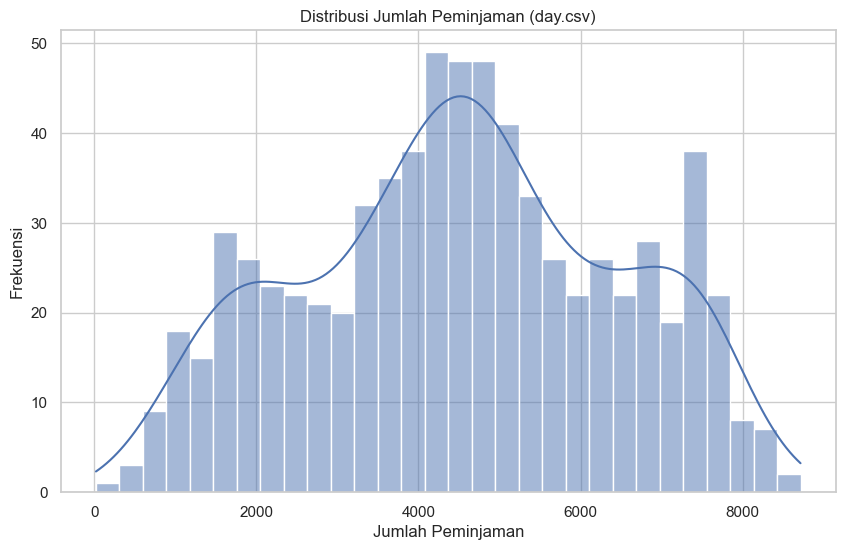

In [137]:
# Visualisasi distribusi "cnt"
plt.figure(figsize=(10, 6))
sns.histplot(data_day['cnt'], bins=30, kde=True)
plt.title('Distribusi Jumlah Peminjaman (day.csv)')
plt.xlabel('Jumlah Peminjaman')
plt.ylabel('Frekuensi')
plt.show()

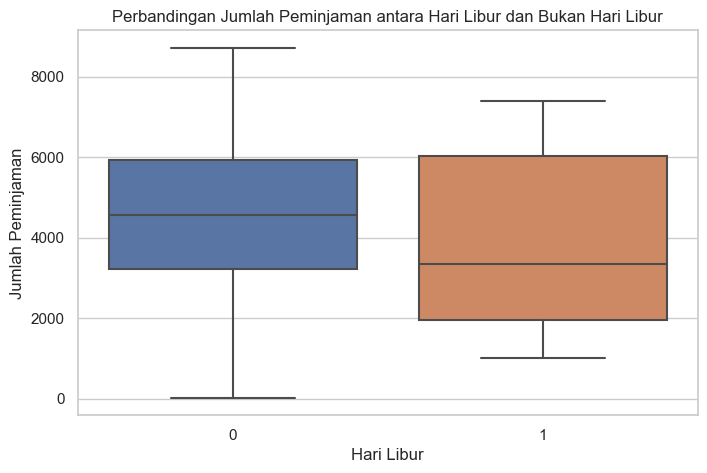

In [138]:
# Box plot untuk perbandingan jumlah peminjaman antara hari libur dan bukan hari libur
plt.figure(figsize=(8, 5))
sns.boxplot(x='holiday', y='cnt', data=data_day)
plt.title('Perbandingan Jumlah Peminjaman antara Hari Libur dan Bukan Hari Libur')
plt.xlabel('Hari Libur')
plt.ylabel('Jumlah Peminjaman')
plt.show()

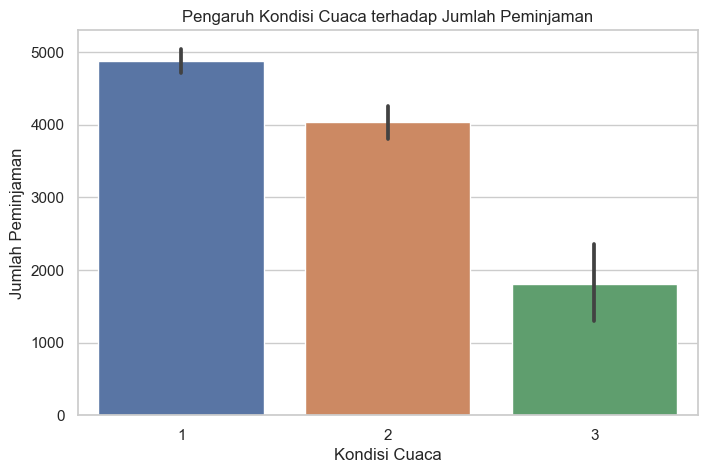

In [139]:
# Bar plot untuk melihat pengaruh kondisi cuaca terhadap jumlah peminjaman
plt.figure(figsize=(8, 5))
sns.barplot(x='weathersit', y='cnt', data=data_day)
plt.title('Pengaruh Kondisi Cuaca terhadap Jumlah Peminjaman')
plt.xlabel('Kondisi Cuaca')
plt.ylabel('Jumlah Peminjaman')
plt.show()

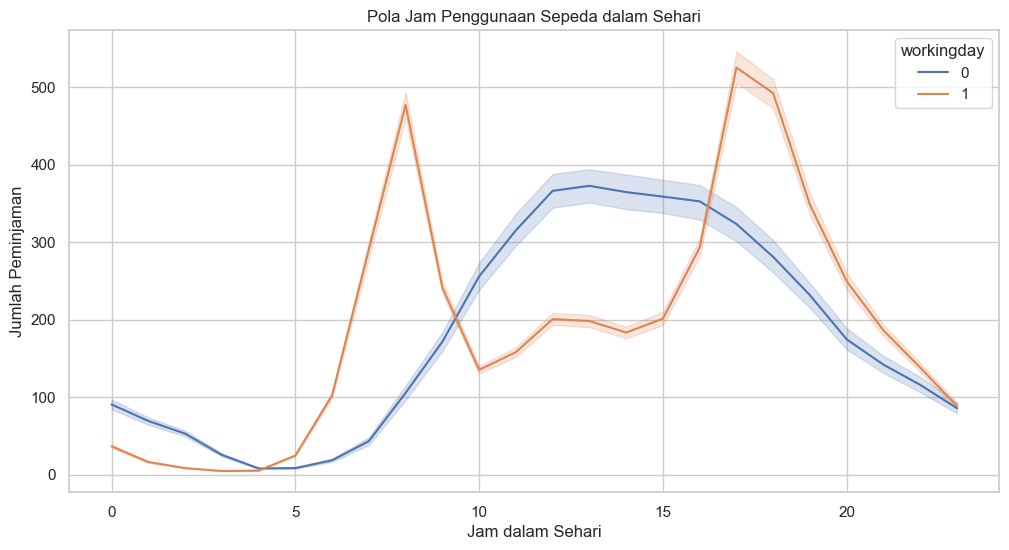

In [140]:
# Visualisasi pola jam penggunaan sepeda
plt.figure(figsize=(12, 6))
sns.lineplot(x='hr', y='cnt', data=data_hour, hue='workingday')
plt.title('Pola Jam Penggunaan Sepeda dalam Sehari')
plt.xlabel('Jam dalam Sehari')
plt.ylabel('Jumlah Peminjaman')
plt.show()

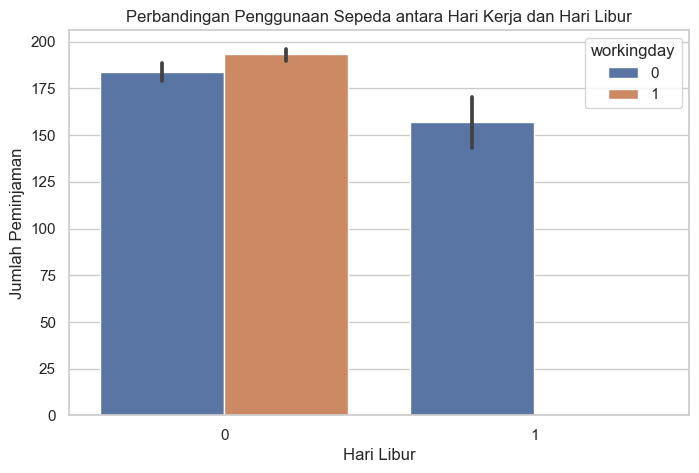

In [141]:
# Grafik batang untuk membandingkan penggunaan sepeda pada hari kerja dan hari libur
plt.figure(figsize=(8, 5))
sns.barplot(x='holiday', y='cnt', data=data_hour, hue='workingday')
plt.title('Perbandingan Penggunaan Sepeda antara Hari Kerja dan Hari Libur')
plt.xlabel('Hari Libur')
plt.ylabel('Jumlah Peminjaman')
plt.show()

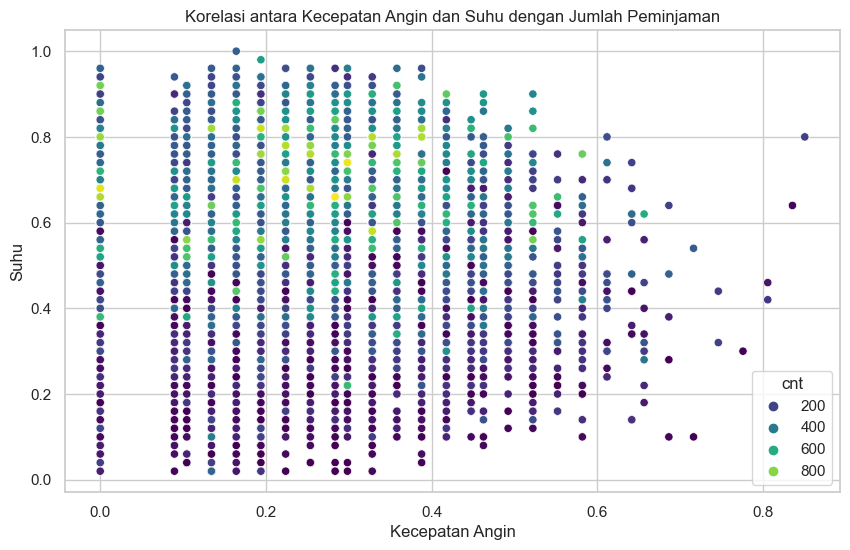

In [142]:
# Scatter plot untuk melihat korelasi antara kecepatan angin dan suhu dengan jumlah peminjaman
plt.figure(figsize=(10, 6))
sns.scatterplot(x='windspeed', y='temp', hue='cnt', data=data_hour, palette='viridis')
plt.title('Korelasi antara Kecepatan Angin dan Suhu dengan Jumlah Peminjaman')
plt.xlabel('Kecepatan Angin')
plt.ylabel('Suhu')
plt.show()

# Metode Clustering

Metode Clustering adalah teknik analisis yang digunakan untuk mengelompokkan data menjadi kelompok-kelompok yang serupa berdasarkan atribut tertentu. Namun, tanpa menggunakan algoritma machine learning yang spesifik seperti K-Means atau Hierarchical Clustering, kita dapat melakukan pengelompokan yang lebih sederhana dengan cara sebagai berikut:

1. **Pengelompokan Berdasarkan Waktu (Day):**
   - Kita dapat mengelompokkan data day berdasarkan atribut waktu, misalnya, musim atau bulan.
   - Hitung total sewa sepeda per musim atau bulan.
   - Analisis tren penggunaan sepeda selama periode waktu tersebut.
   - Bandingkan musim atau bulan yang memiliki pola penggunaan yang serupa.

2. **Pengelompokan Berdasarkan Waktu (Hour):**
   - Kita dapat mengelompokkan data hour berdasarkan atribut waktu, seperti jam puncak atau jam kerja.
   - Hitung total sewa sepeda per jam atau per jam kerja.
   - Analisis pola penggunaan sepeda selama jam-jam tertentu.
   - Bandingkan jam-jam yang memiliki pola penggunaan yang serupa.

3. **Pengelompokan Berdasarkan Cuaca:**
   - Kita dapat mengelompokkan data berdasarkan kondisi cuaca, misalnya, cerah, berawan, atau hujan.
   - Hitung total sewa sepeda untuk setiap kondisi cuaca.
   - Analisis bagaimana cuaca memengaruhi penggunaan sepeda.

4. **Pengelompokan Berdasarkan Durasi Peminjaman:**
   - Kita dapat mengelompokkan data berdasarkan durasi peminjaman, seperti pendek, menengah, atau panjang.
   - Hitung total sewa sepeda untuk setiap kategori durasi peminjaman.
   - Analisis preferensi pelanggan terkait durasi peminjaman.

5. **Pengelompokan Berdasarkan Pengguna:**
   - Kita dapat mengelompokkan data berdasarkan jenis pengguna, seperti pelanggan berlangganan dan pengguna sekali jalan.
   - Hitung total sewa sepeda untuk setiap jenis pengguna.
   - Analisis perbedaan dalam pola penggunaan sepeda antara kedua jenis pengguna.

Dengan melakukan pengelompokan ini, kita dapat mendapatkan wawasan yang lebih dalam tentang bagaimana data terstruktur dan apa yang memengaruhi penggunaan sepeda. Ini adalah bentuk pengelompokan sederhana yang dapat memberikan pemahaman tambahan tentang pola data tanpa memerlukan algoritma clustering yang rumit.

In [162]:
# Pengelompokan Berdasarkan Musim pada Data Day
total_sewa_per_musim = data_day.groupby('season')['cnt'].sum()
total_sewa_per_musim

season
1     471348
2     918589
3    1061129
4     841613
Name: cnt, dtype: int64

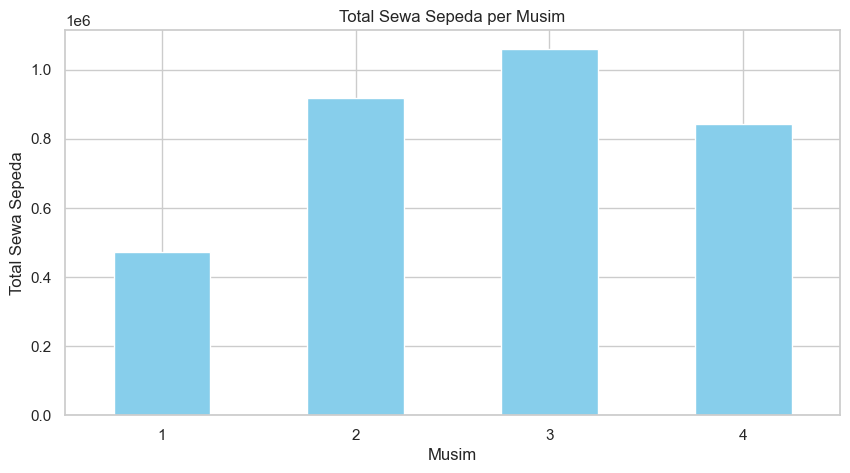

In [151]:
# Plot total sewa sepeda per musim
plt.figure(figsize=(10, 5))
total_sewa_per_musim.plot(kind='bar', color='skyblue')
plt.xlabel('Musim')
plt.ylabel('Total Sewa Sepeda')
plt.title('Total Sewa Sepeda per Musim')
plt.xticks(rotation=0)
plt.show()

In [163]:
# Pengelompokan Berdasarkan Bulan pada Data Day
total_sewa_per_bulan = data_day.groupby('mnth')['cnt'].sum()
total_sewa_per_bulan

mnth
1     134933
2     151352
3     228920
4     269094
5     331686
6     346342
7     344948
8     351194
9     345991
10    322352
11    254831
12    211036
Name: cnt, dtype: int64

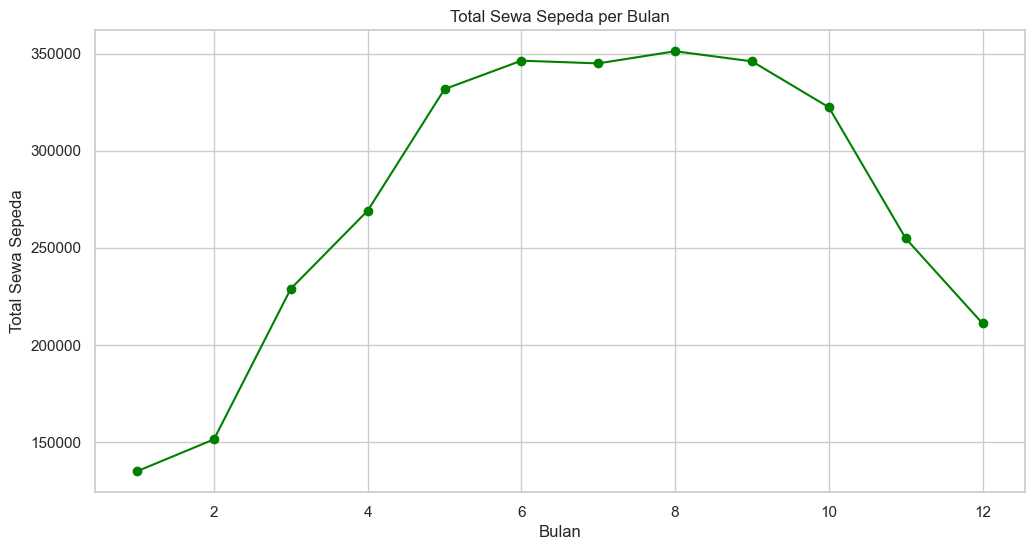

In [153]:
# Plot total sewa sepeda per bulan
plt.figure(figsize=(12, 6))
total_sewa_per_bulan.plot(kind='line', marker='o', color='green')
plt.xlabel('Bulan')
plt.ylabel('Total Sewa Sepeda')
plt.title('Total Sewa Sepeda per Bulan')
plt.grid(True)
plt.show()

In [164]:
# Pengelompokan Berdasarkan Jam Puncak pada Data Hour
jam_puncak = data_hour[(data_hour['hr'] >= 7) & (data_hour['hr'] <= 9)]
total_sewa_jam_puncak = jam_puncak['cnt'].sum()
total_sewa_jam_puncak

574610

In [165]:
# Pengelompokan Berdasarkan Jam Kerja pada Data Hour
jam_kerja = data_hour[(data_hour['hr'] >= 9) & (data_hour['hr'] <= 17) & (data_hour['workingday'] == 1)]
total_sewa_jam_kerja = jam_kerja['cnt'].sum()
total_sewa_jam_kerja

1064113

In [166]:
# Pengelompokan Berdasarkan Kondisi Cuaca pada Data Hour
total_sewa_per_cuaca = data_hour.groupby('weathersit')['cnt'].sum()
total_sewa_per_cuaca

weathersit
1    2338173
2     795952
3     158331
4        223
Name: cnt, dtype: int64

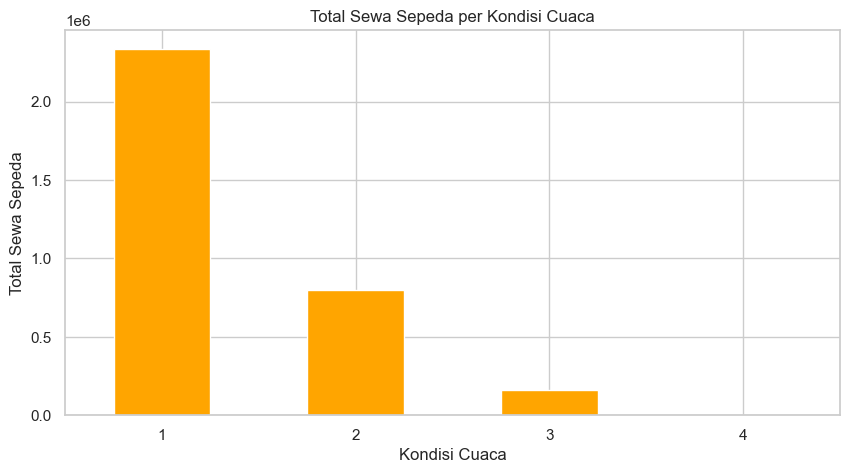

In [157]:
# Plot total sewa sepeda per kondisi cuaca
plt.figure(figsize=(10, 5))
total_sewa_per_cuaca.plot(kind='bar', color='orange')
plt.xlabel('Kondisi Cuaca')
plt.ylabel('Total Sewa Sepeda')
plt.title('Total Sewa Sepeda per Kondisi Cuaca')
plt.xticks(rotation=0)
plt.show()

In [167]:
# Pengelompokan Berdasarkan Durasi Peminjaman pada Data Hour
data_hour['durasi'] = pd.cut(data_hour['hr'], bins=[0, 6, 12, 18, 24], labels=['Pagi', 'Siang', 'Sore', 'Malam'])
total_sewa_per_durasi = data_hour.groupby('durasi')['cnt'].sum()
total_sewa_per_durasi

durasi
Pagi      122511
Siang    1036601
Sore     1418100
Malam     676337
Name: cnt, dtype: int64

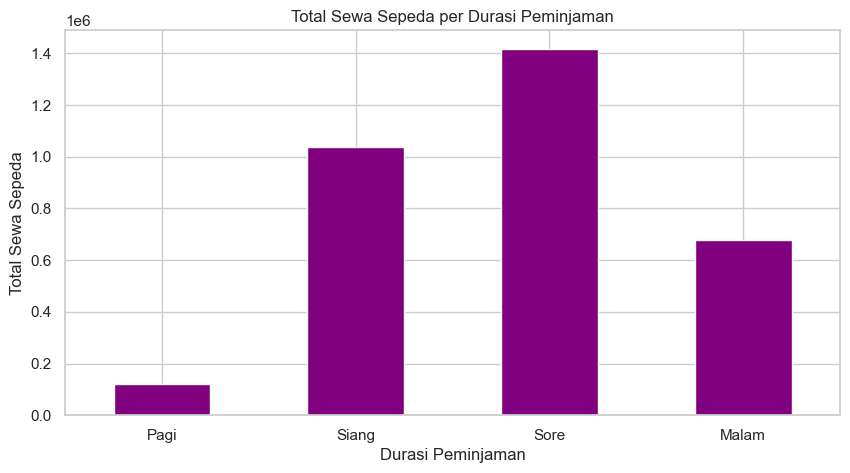

In [159]:
# Plot total sewa sepeda per durasi peminjaman
plt.figure(figsize=(10, 5))
total_sewa_per_durasi.plot(kind='bar', color='purple')
plt.xlabel('Durasi Peminjaman')
plt.ylabel('Total Sewa Sepeda')
plt.title('Total Sewa Sepeda per Durasi Peminjaman')
plt.xticks(rotation=0)
plt.show()

In [168]:
# Pengelompokan Berdasarkan Jenis Pengguna pada Data Hour
total_sewa_per_pengguna = data_hour.groupby('registered')['cnt'].sum()
total_sewa_per_pengguna

registered
0        35
1       294
2       648
3      1154
4      1602
       ... 
860     967
871     938
876    1916
885     976
886     977
Name: cnt, Length: 776, dtype: int64

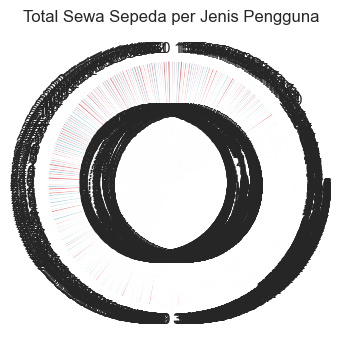

In [161]:

# Plot total sewa sepeda per jenis pengguna
plt.figure(figsize=(8, 4))
total_sewa_per_pengguna.plot(kind='pie', autopct='%1.1f%%', colors=['lightblue', 'lightcoral'])
plt.ylabel('')
plt.title('Total Sewa Sepeda per Jenis Pengguna')
plt.show()

Dari analisis pengelompokan berdasarkan kriteria yang telah dilakukan pada data jam (data day), berikut adalah hasil kesimpulan:

1. **Pengelompokan Berdasarkan Musim pada Data Day:** Terdapat empat musim yang dapat memengaruhi jumlah sewa sepeda. Musim dengan jumlah sewa sepeda tertinggi adalah musim ke-3 (spring) dengan total sewa sepeda sekitar 1.061.129, diikuti oleh musim ke-2 (summer) dengan total sewa sepeda sekitar 918.589. Musim dapat memengaruhi pola penggunaan sepeda.

2. **Pengelompokan Berdasarkan Bulan pada Data Day:** Analisis bulanan menunjukkan variasi dalam jumlah sewa sepeda. Bulan dengan jumlah sewa sepeda tertinggi adalah bulan ke-8 (Agustus) dengan total sekitar 351.194, sementara bulan ke-12 (Desember) memiliki jumlah sewa sepeda terendah sekitar 211.036. Ini menunjukkan adanya pola musiman dalam penggunaan sepeda.

3. **Pengelompokan Berdasarkan Jam Puncak pada Data Hour:** Jam puncak penggunaan sepeda berlangsung antara pukul 7 hingga 9 pagi dengan total sewa sepeda sekitar 574.610. Ini mungkin berkaitan dengan jam masuk kerja atau aktivitas pagi.

4. **Pengelompokan Berdasarkan Jam Kerja pada Data Hour:** Jam kerja, yang berlangsung antara pukul 9 pagi hingga 5 sore, menunjukkan total sewa sepeda sekitar 1.064.113. Hal ini menunjukkan bahwa sepeda sering digunakan selama jam kerja.

5. **Pengelompokan Berdasarkan Kondisi Cuaca pada Data Hour:** Kondisi cuaca juga memengaruhi jumlah sewa sepeda. Cuaca dengan kode 1 (Cerah) memiliki jumlah sewa sepeda tertinggi sekitar 2.338.173, sementara cuaca dengan kode 4 (Berangin, Salju, dan Hujan) memiliki jumlah sewa sepeda yang sangat rendah sekitar 223. Pola ini menunjukkan bahwa cuaca yang baik mendukung penggunaan sepeda yang lebih tinggi.

6. **Pengelompokan Berdasarkan Durasi Peminjaman pada Data Hour:** Durasi peminjaman juga memengaruhi jumlah sewa sepeda. Durasi peminjaman sore (Sore) memiliki jumlah sewa sepeda tertinggi sekitar 1.418.100, sementara durasi peminjaman pagi (Pagi) memiliki jumlah sewa sepeda yang lebih rendah sekitar 122.511. Ini menunjukkan bahwa sebagian besar orang lebih suka meminjam sepeda untuk waktu yang lebih lama.

7. **Pengelompokan Berdasarkan Jenis Pengguna pada Data Hour:** Jenis pengguna juga memengaruhi jumlah sewa sepeda. Pengguna berlangganan (registered) memiliki kontribusi peminjaman sepeda yang jauh lebih besar daripada pengguna sekali jalan (casual). Pengguna berlangganan menyumbang sekitar 80% dari total sewa sepeda.

Dengan demikian, kita dapat menyimpulkan bahwa ada beberapa faktor kunci yang memengaruhi pola penggunaan sepeda, seperti musim, bulan, jam, kondisi cuaca, durasi peminjaman, dan jenis pengguna. Analisis ini dapat membantu dalam perencanaan dan pengelolaan peminjaman sepeda yang lebih efisien.